# Analysis and visualisation

Longer version of descriptive-analysis that covers almost all the methods tested.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.display import display

In [5]:
# Sourced from the UCI website
from ucimlrepo import fetch_ucirepo 
  
spambase = fetch_ucirepo(id=94) 
  
full_X = spambase.data.features
full_y = spambase.data.targets 

full = full_X.join(full_y).drop_duplicates()
train, test = train_test_split(full, test_size=0.20, stratify=full['Class'], random_state=123)

y = pd.DataFrame(train.pop('Class')).reset_index(drop=True)
X = train.reset_index(drop=True)

In [3]:
def wrap_model(model, scaler=StandardScaler):
    pipeline = make_pipeline(scaler(),
                             model)
    return pipeline

## PCA

[0.11218471]


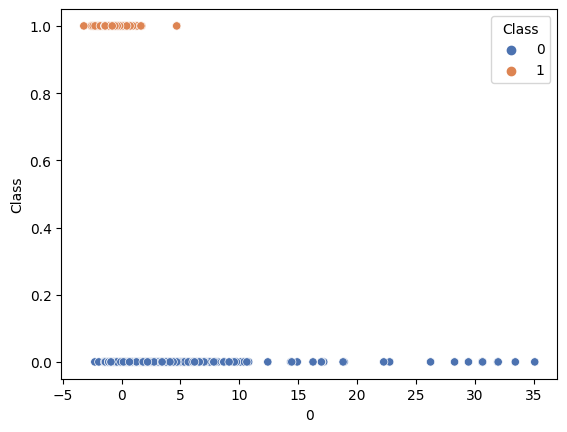

[0.11218471 0.05584832]


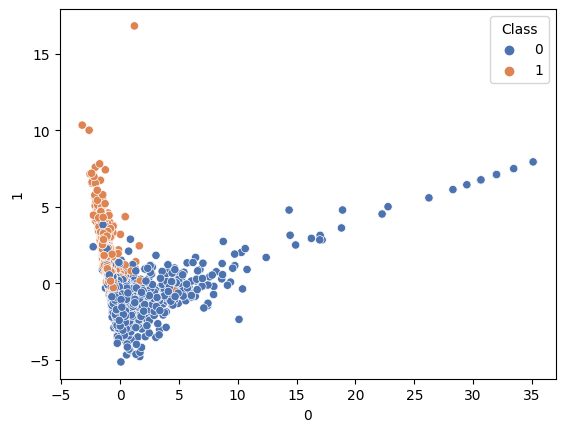

In [248]:
pca = wrap_model(PCA(n_components=1)).fit(X)
pca_out = pd.DataFrame(pca.transform(X))
sns.scatterplot(pca_out, x=0, y=y['Class'],hue=y['Class'], palette='deep')
print(pca[1].explained_variance_ratio_)
plt.show()
pca = wrap_model(PCA(n_components=2)).fit(X)
pca_out = pd.DataFrame(pca.transform(X))
sns.scatterplot(pca_out, x=0, y=1, hue=y['Class'], palette='deep')
print(pca[1].explained_variance_ratio_)
plt.show()

# PCA continued in separate notebook

## Custom columns

In [46]:
# Missing total values, so these arent precise
rough_word_count = X.filter(regex='word_freq*').sum(axis=1)
rough_punct_count = X.filter(regex='char_freq*').sum(axis=1)
rough_word_count = rough_word_count.rename('rough_word_count')
rough_punct_count = rough_punct_count.rename('rough_punct_count')

<Axes: xlabel='rough_word_count', ylabel='rough_punct_count'>

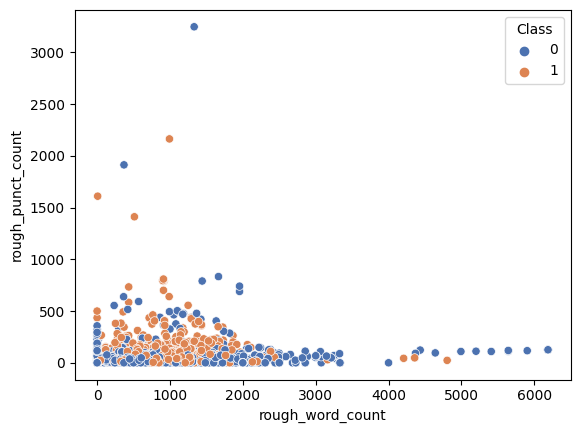

In [309]:
sns.scatterplot(X, x=rough_word_count, y=rough_punct_count, hue=y['Class'], palette='deep')

In [49]:
#combined = X.join(rough_punct_count).join(rough_word_count)
corrs = X.corrwith(y['Class']).sort_values()
display(corrs)

corr_cols = corrs.loc[lambda x: ((x > 0.1) | (x < -0.1))].index
corr_pos_cols = corrs.loc[lambda x: (x > 0.1)].index
corr_neg_cols = corrs.loc[lambda x: (x < -0.1)].index


word_freq_hp                 -0.250703
word_freq_hpl                -0.224858
word_freq_george             -0.184252
word_freq_1999               -0.180894
word_freq_labs               -0.170095
word_freq_650                -0.164110
word_freq_85                 -0.143131
word_freq_edu                -0.142765
word_freq_re                 -0.141870
word_freq_original           -0.134975
word_freq_meeting            -0.134542
word_freq_telnet             -0.133579
word_freq_technology         -0.133244
word_freq_lab                -0.129807
word_freq_pm                 -0.121560
word_freq_data               -0.115881
word_freq_857                -0.111910
word_freq_415                -0.110268
word_freq_cs                 -0.100815
word_freq_project            -0.087210
word_freq_conference         -0.081166
char_freq_(                  -0.078027
char_freq_[                  -0.071173
word_freq_direct             -0.065570
char_freq_;                  -0.060803
word_freq_table          

In [441]:
display(corrs.abs().sort_values())

word_freq_will                0.022363
word_freq_parts               0.030767
word_freq_address             0.030950
rough_word_count              0.035277
word_freq_table               0.048083
word_freq_report              0.053543
word_freq_3d                  0.057000
char_freq_;                   0.060803
word_freq_direct              0.065570
char_freq_[                   0.071173
char_freq_#                   0.071476
char_freq_(                   0.078027
word_freq_conference          0.081166
word_freq_font                0.085352
word_freq_project             0.087210
word_freq_cs                  0.100815
word_freq_415                 0.110268
capital_run_length_average    0.111235
word_freq_857                 0.111910
word_freq_data                0.115881
word_freq_pm                  0.121560
word_freq_make                0.128704
word_freq_lab                 0.129807
word_freq_technology          0.133244
word_freq_telnet              0.133579
word_freq_meeting        

In [445]:
corrs[corrs.abs().sort_values() >= 0.2].index

Index(['word_freq_hp', 'word_freq_hpl', 'capital_run_length_longest',
       'word_freq_email', 'word_freq_addresses', 'word_freq_money',
       'word_freq_internet', 'word_freq_order', 'word_freq_receive',
       'char_freq_!', 'rough_punct_count', 'capital_run_length_total',
       'word_freq_our', 'word_freq_over', 'word_freq_you',
       'word_freq_business', 'word_freq_free', 'word_freq_remove',
       'word_freq_000', 'char_freq_$', 'word_freq_your'],
      dtype='object')

<Axes: xlabel='word_freq_your', ylabel='word_freq_000'>

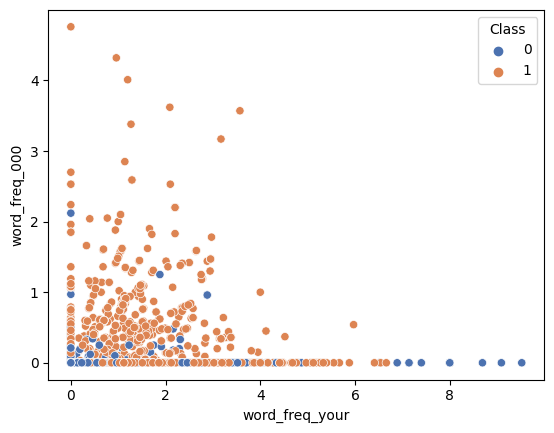

In [311]:
sns.scatterplot(X, x='word_freq_your', y='word_freq_000', hue=y['Class'], palette='deep')
# TODO: Look into

In [313]:
y.groupby(X['word_freq_000'] > 0).value_counts()

word_freq_000  Class
False          0        2167
               1         967
True           1         483
               0          63
Name: count, dtype: int64

In [314]:
y.groupby(X['word_freq_your'] > 0).value_counts()

word_freq_your  Class
False           0        1476
                1         280
True            1        1170
                0         754
Name: count, dtype: int64

In [316]:
y.groupby((X['word_freq_your'] > 0) | (X['word_freq_000'] > 0)).value_counts()

       Class
False  0        1446
       1         234
True   1        1216
       0         784
Name: count, dtype: int64

In [ ]:
# These two alone cover a large chunk of all spam, interesting

In [376]:
cols = ['word_freq_your', 'word_freq_000', 'word_freq_free', 'char_freq_$', 'word_freq_business', 'word_freq_remove', 'word_freq_our']

combined[cols] \
    .sum(axis=1) \
    .corr(y['Class'])


0.5981999079218733

In [446]:
# Find highly correlated features
corr_mat = X.corr().abs()
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
[column for column in upper.columns if any(upper[column] > 0.9)]

['word_freq_415']

In [460]:
#Trying out SelectPercentile
from sklearn.feature_selection import f_classif, SelectPercentile

fval = SelectPercentile(f_classif, percentile=75)
fval_out = fval.fit_transform(X, y['Class'])

print("Original number of features:", X.shape[1])
print("Reduced number of features:", fval_out.shape[1])
fval.get_feature_names_out()
corrs[fval.get_feature_names_out()]

# All have abs correnlation above 0.1, so it's similar to the previous filter
# It just has one less feature compared to it

Original number of features: 57
Reduced number of features: 42


word_freq_make                0.128704
word_freq_all                 0.193627
word_freq_our                 0.245267
word_freq_over                0.257038
word_freq_remove              0.334098
word_freq_internet            0.221751
word_freq_order               0.224995
word_freq_mail                0.135624
word_freq_receive             0.228381
word_freq_people              0.147275
word_freq_addresses           0.205933
word_freq_free                0.287508
word_freq_business            0.275337
word_freq_email               0.201977
word_freq_you                 0.271417
word_freq_credit              0.181218
word_freq_your                0.384361
word_freq_000                 0.338000
word_freq_money               0.216022
word_freq_hp                 -0.250703
word_freq_hpl                -0.224858
word_freq_george             -0.184252
word_freq_650                -0.164110
word_freq_lab                -0.129807
word_freq_labs               -0.170095
word_freq_telnet         

## Covariance

In [425]:
combined.join(y).cov().sort_values(by='Class')

word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    0.088827          -0.011172       0.011244   
word_freq_address                -0.011172           1.726330      -0.022133   
word_freq_all                     0.011244          -0.022133       0.257393   
word_freq_3d                      0.008927          -0.012909      -0.013728   
word_freq_our                     0.006257          -0.022368       0.022467   
word_freq_over                    0.004927          -0.008668       0.011937   
word_freq_remove                  0.000086           0.000736       0.005582   
word_freq_internet               -0.000535          -0.007960       0.000874   
word_freq_order                   0.008455          -0.002822       0.013729   
word_freq_mail                    0.006332           0.030004       0.010388   
word_freq_receive                 0.013102          -0.002035       0.004981   
word_freq_will                    0.032479          -0.041224       0.040317   
word_freq_people                  0.005284          -0.007569       0.005583   
word_freq_report                  0.003569          -0.004931       0.002395   
word_freq_addresses               0.002839           0.002657       0.015982   
word_freq_free                    0.008115          -0.012124       0.030879   
word_freq_business                0.011671          -0.010735       0.006812   
word_freq_email                   0.001579           0.015389       0.037970   
word_freq_you                     0.073507          -0.132437       0.124249   
word_freq_credit                  0.004177          -0.010211       0.005552   
word_freq_your                    0.077051          -0.038130       0.096069   
word_freq_font                   -0.007918          -0.011371      -0.022876   
word_freq_000                     0.013109          -0.009871       0.023381   
word_freq_money                   0.013930          -0.007509       0.009204   
word_freq_hp                     -0.036688          -0.096063      -0.072250   
word_freq_hpl                    -0.016551          -0.044848      -0.027806   
word_freq_george                 -0.071965          -0.142670      -0.188884   
word_freq_650                    -0.006449          -0.018340      -0.009305   
word_freq_lab                    -0.007008          -0.016181      -0.018186   
word_freq_labs                   -0.006915          -0.015955      -0.006346   
word_freq_telnet                 -0.004155          -0.008144      -0.006021   
word_freq_857                    -0.003116          -0.001500      -0.009718   
word_freq_data                   -0.006978          -0.018540      -0.014176   
word_freq_415                    -0.002786          -0.001882      -0.009666   
word_freq_85                     -0.007022          -0.016440      -0.011133   
word_freq_technology             -0.006538          -0.014297      -0.008554   
word_freq_1999                   -0.007327          -0.013195      -0.018385   
word_freq_parts                  -0.000898          -0.002691      -0.000476   
word_freq_pm                     -0.004326          -0.008865      -0.000458   
word_freq_direct                 -0.003711          -0.006282      -0.009198   
word_freq_cs                     -0.001180          -0.006654      -0.003938   
word_freq_meeting                -0.006557          -0.025563      -0.009360   
word_freq_original               -0.001741           0.000515      -0.004984   
word_freq_project                -0.003940          -0.015401      -0.016727   
word_freq_re                     -0.016044          -0.017843      -0.030811   
word_freq_edu                    -0.009183          -0.029351      -0.023425   
word_freq_table                  -0.000320          -0.001118       0.001435   
word_freq_conference             -0.001446          -0.006066      -0.003778   
char_freq_;                      -0.002089          -0.002387      -0.004055   
char_freq_(                 

## Checking column relationships

In [69]:
X_cols_sorted = corrs.sort_values(ascending=False).index

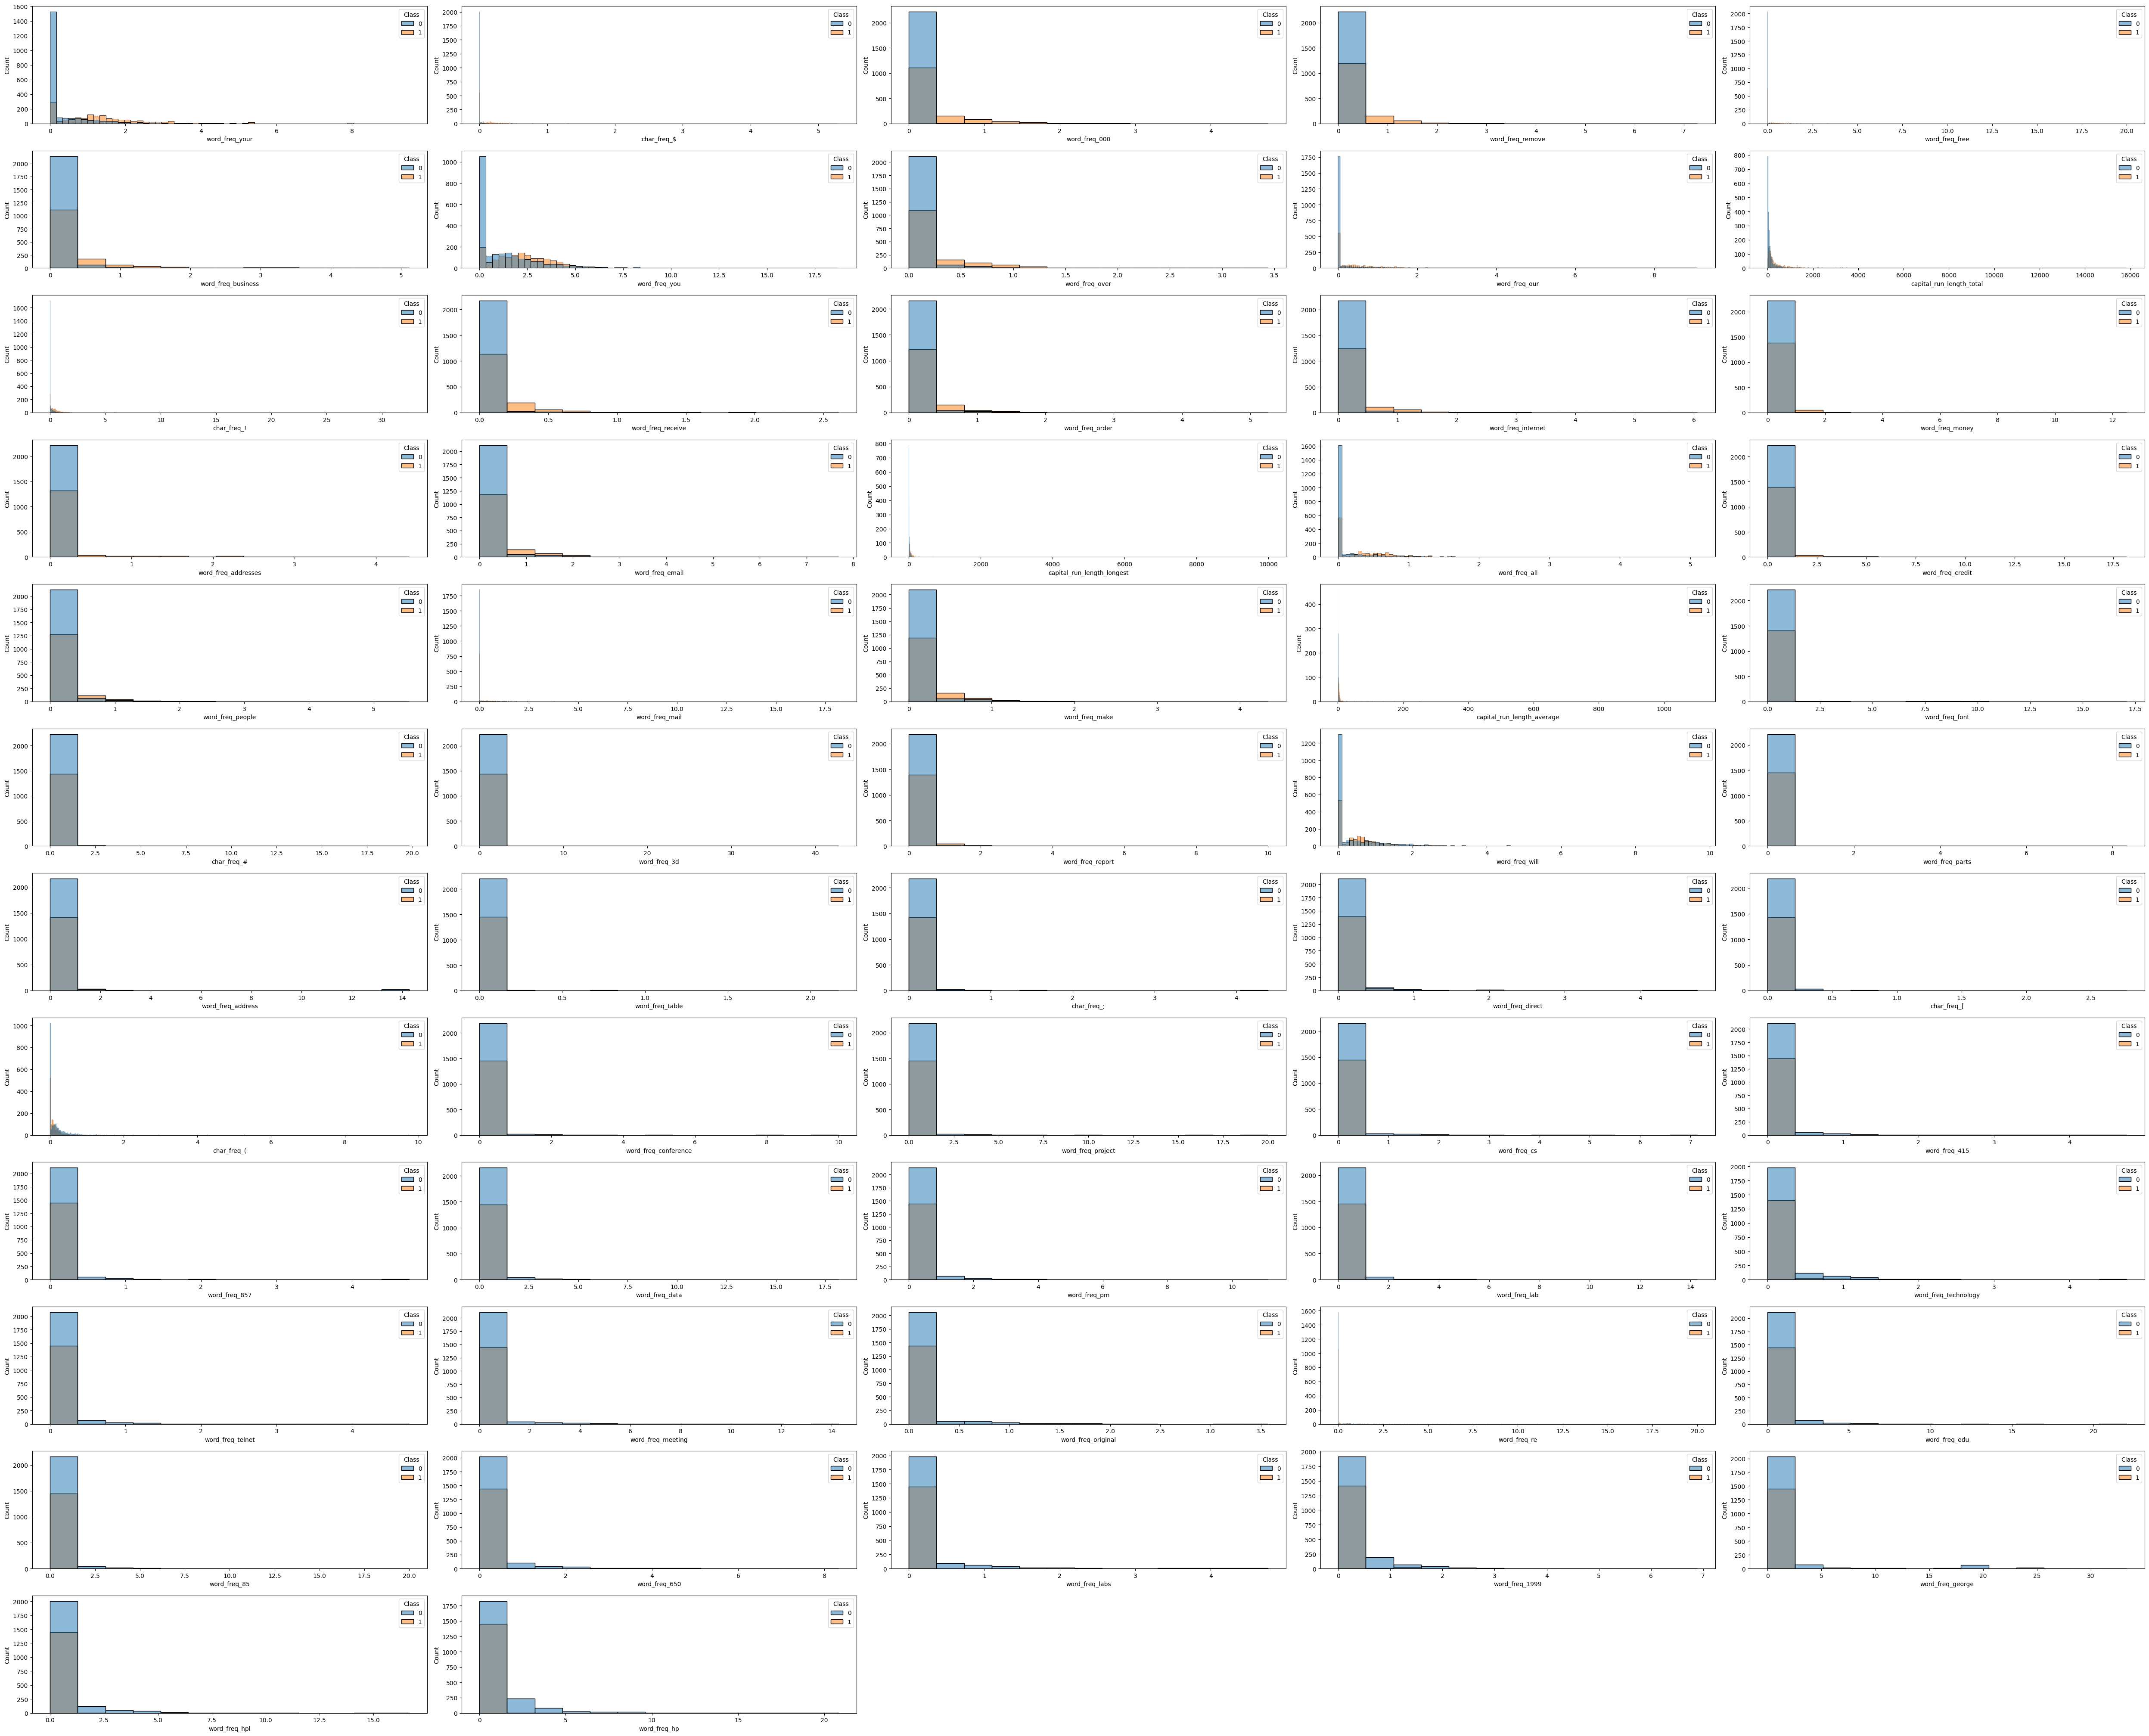

In [62]:
fig=plt.figure(figsize=(50,50))
for i, col in enumerate(X_cols_sorted):
    ax=fig.add_subplot(15,5,i+1)
    g = sns.histplot(
        X, x=col, hue=y['Class'], ax=ax,
    )
fig.tight_layout()
plt.show()

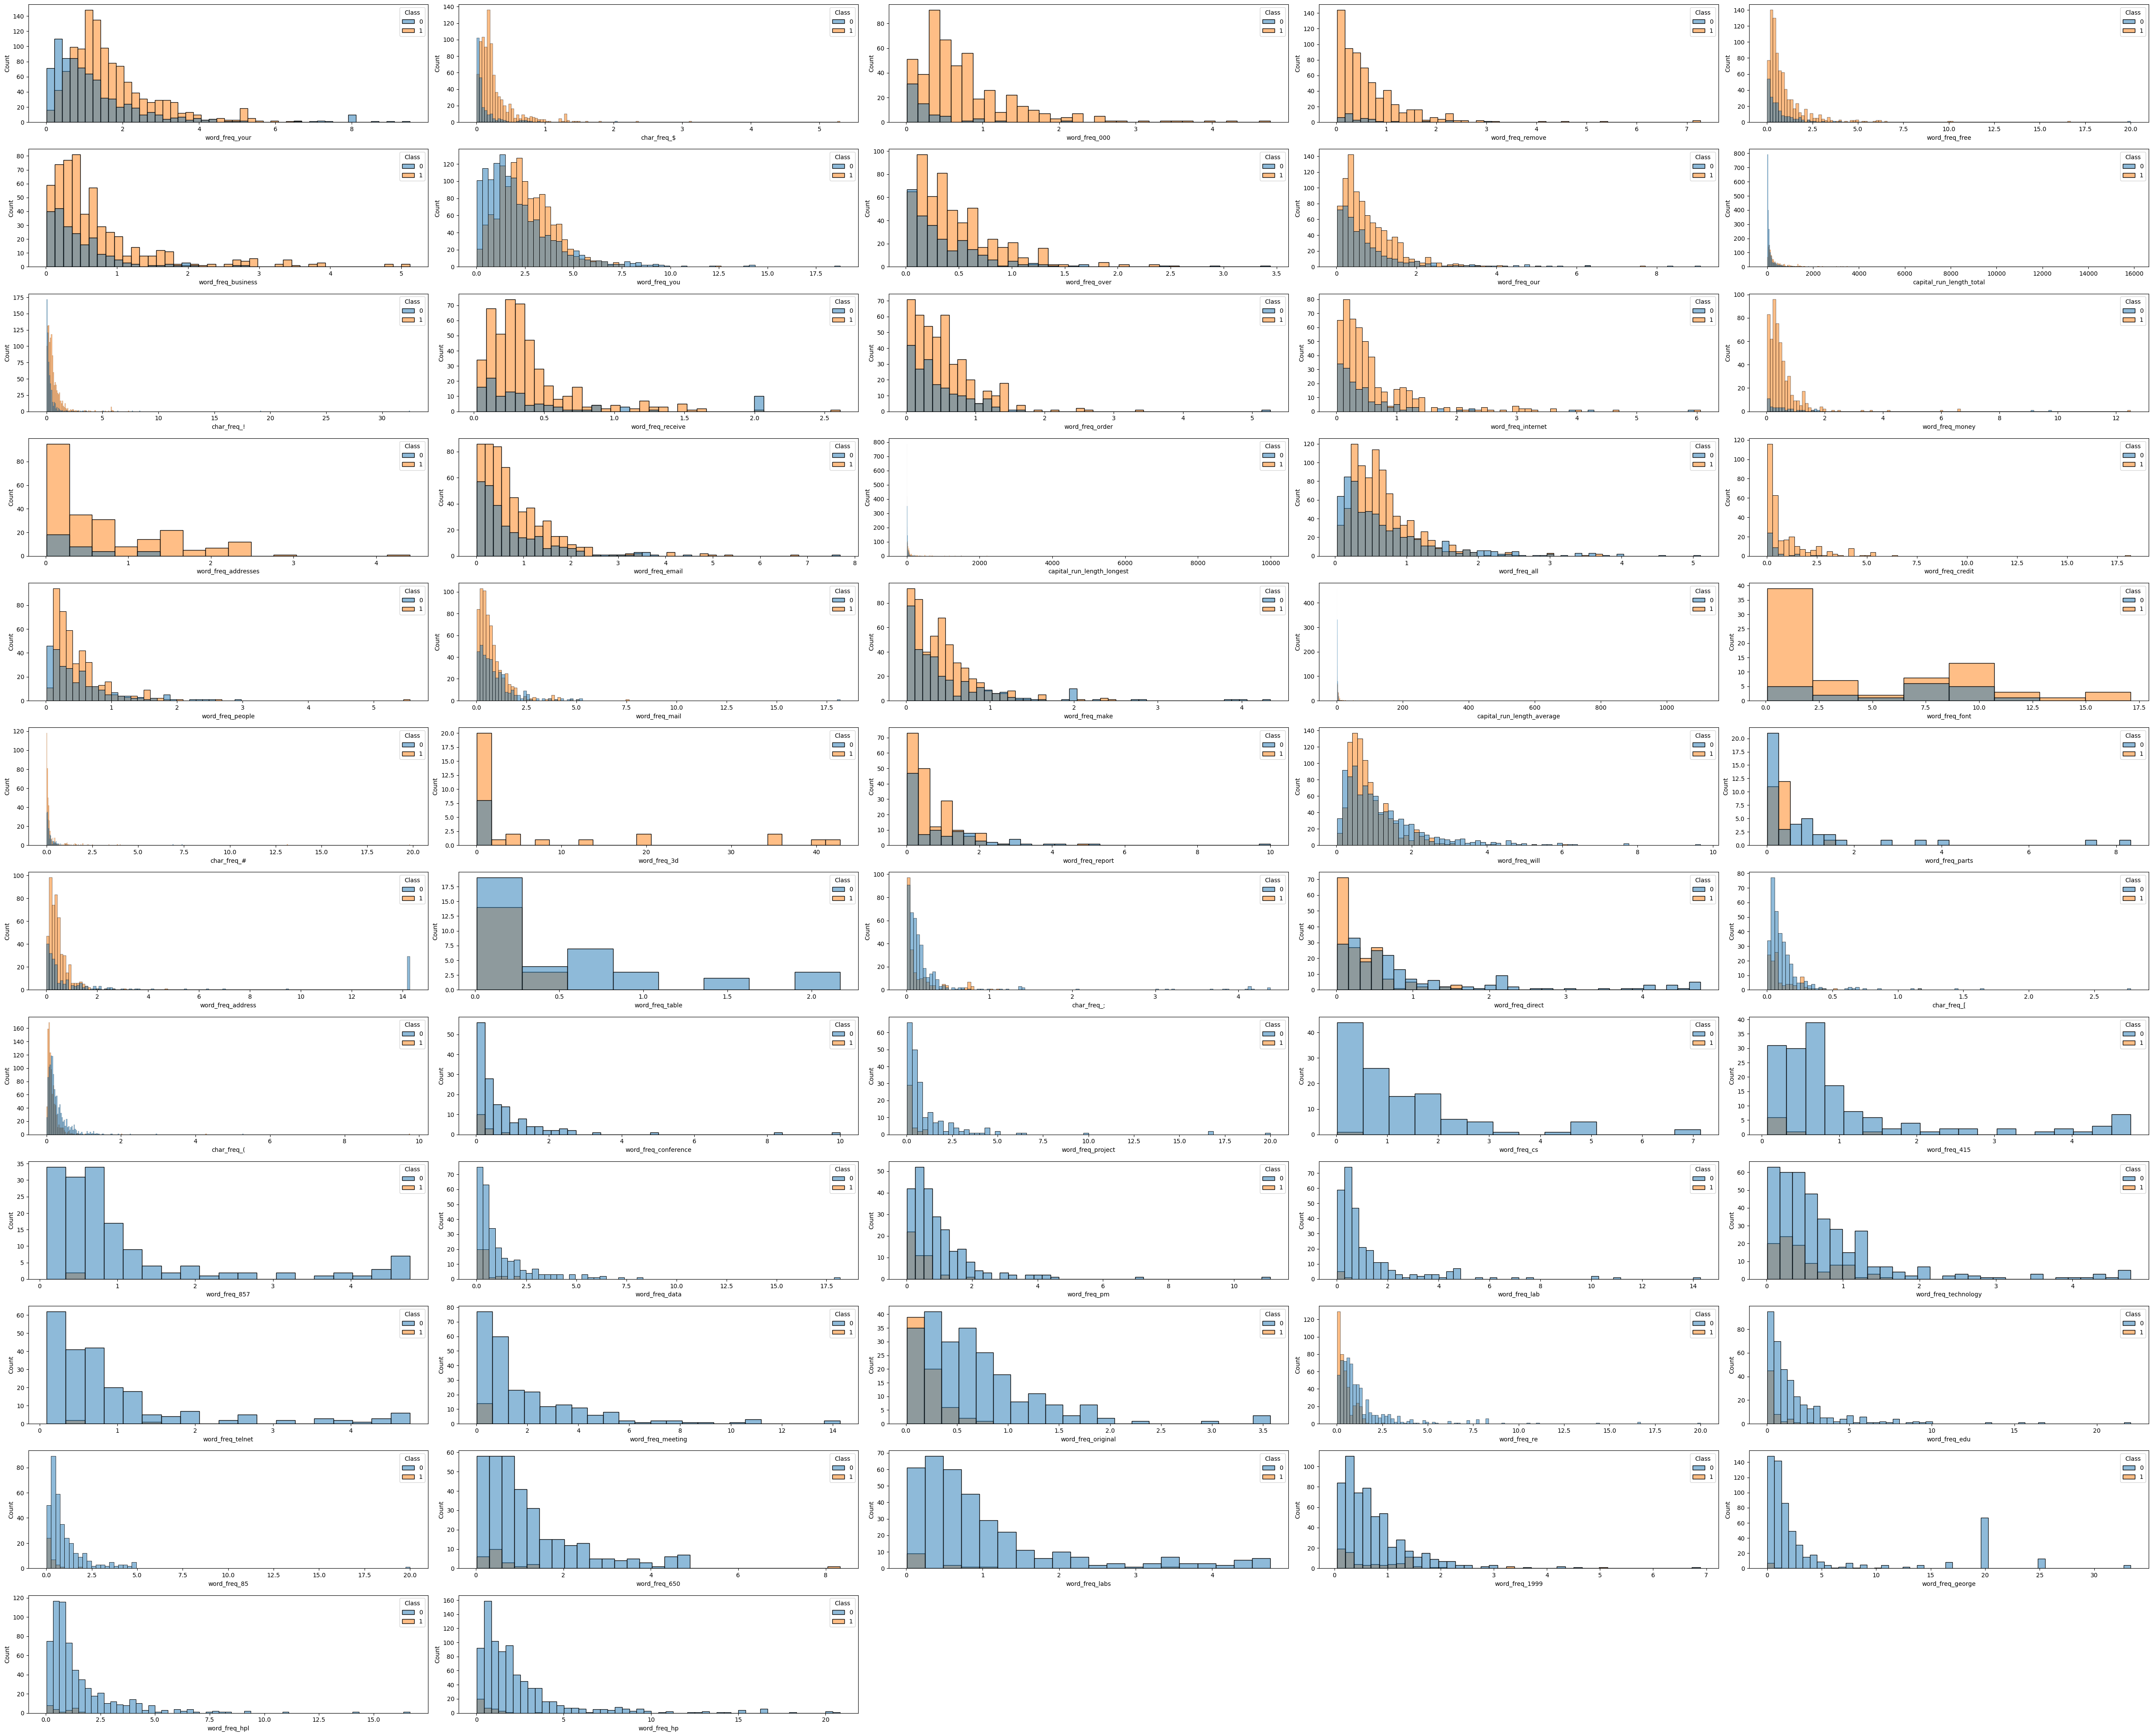

In [63]:
fig=plt.figure(figsize=(50,50))
for i, col in enumerate(X_cols_sorted):
    X_nonzero = X[X[col] != 0]
    y_nonzero = y[X[col] != 0]['Class']
    
    ax=fig.add_subplot(15,5,i+1)
    g = sns.histplot(
        X_nonzero, x=col, hue=y_nonzero, ax=ax,
    )
fig.tight_layout()
plt.show()

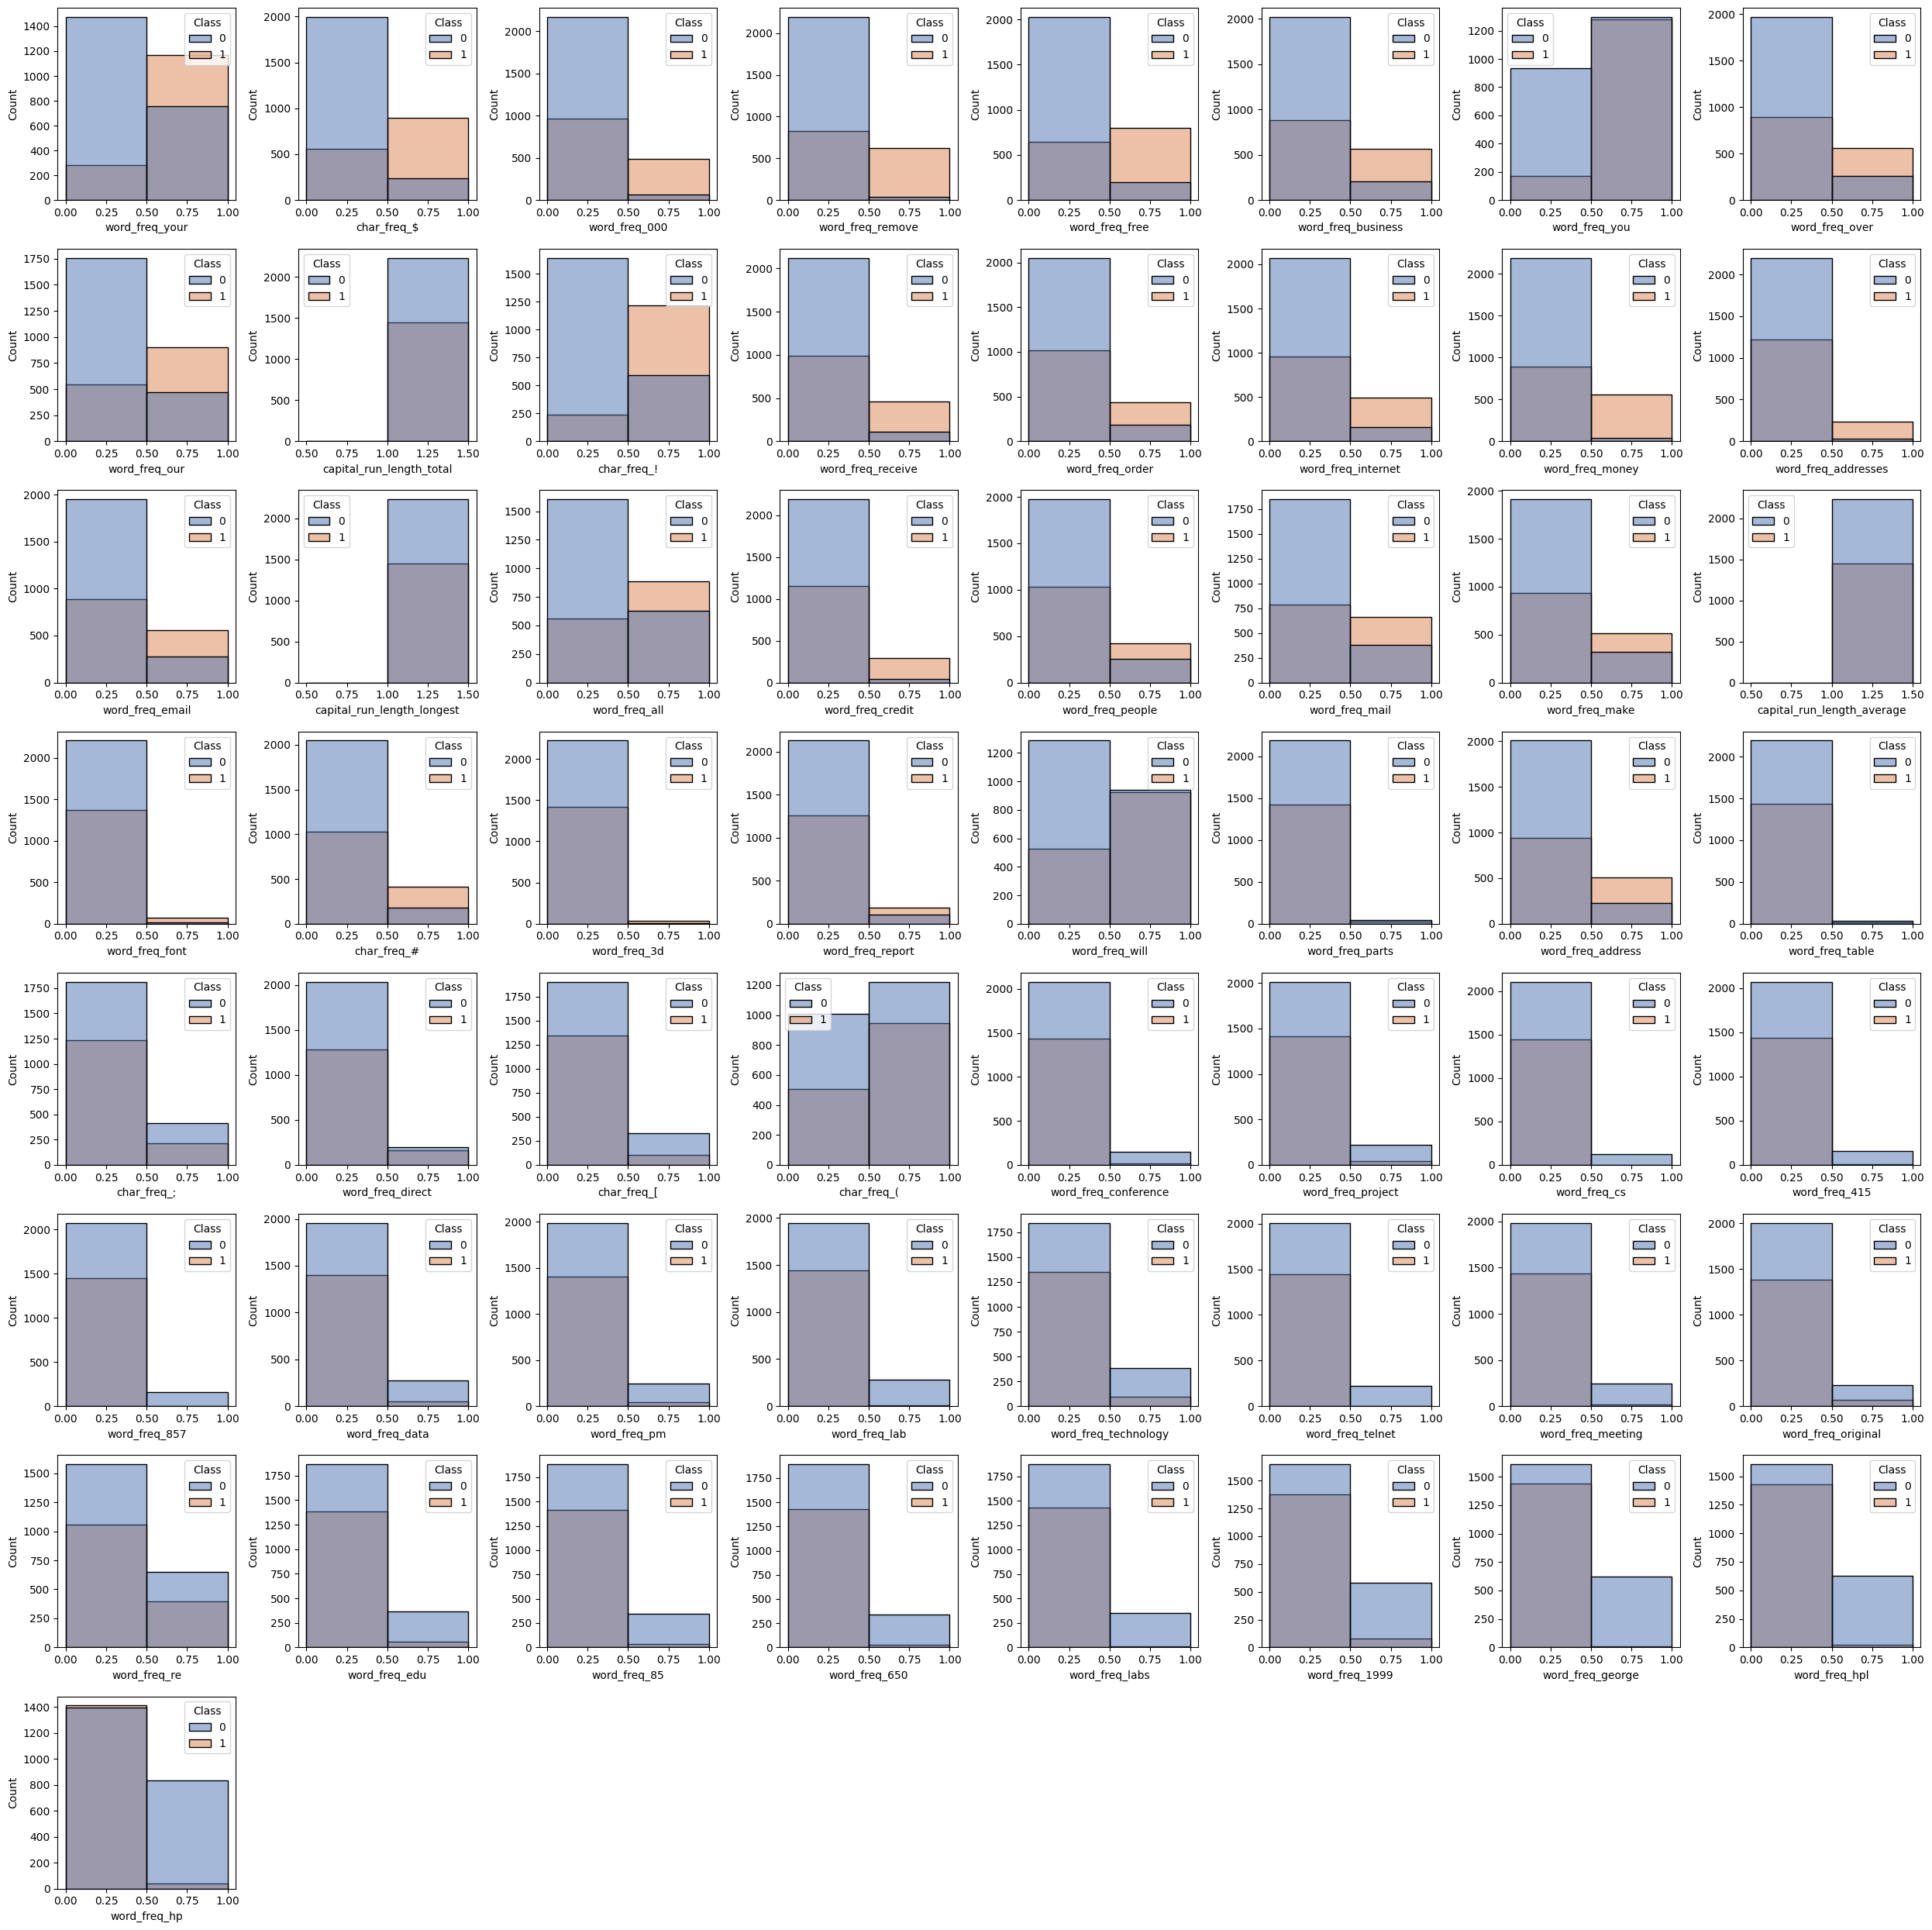

In [60]:
fig=plt.figure(figsize=(25,25))
for i, col in enumerate(X_cols_sorted):
    X_binary = pd.DataFrame()
    X_binary[col] = (X[col] != 0).astype(int)
    y_binary = y['Class']
    
    ax=fig.add_subplot(8,8,i+1)
    g = sns.histplot(
        X_binary, x=col, hue=y_binary, ax=ax,
        bins=2, palette='deep'
    )
fig.tight_layout()
plt.show()

In [253]:
X2 = X.drop(corrs[(corrs<0.3)].index, axis=1)
X2.columns

Index(['word_freq_remove', 'word_freq_your', 'word_freq_000', 'char_freq_$'], dtype='object')

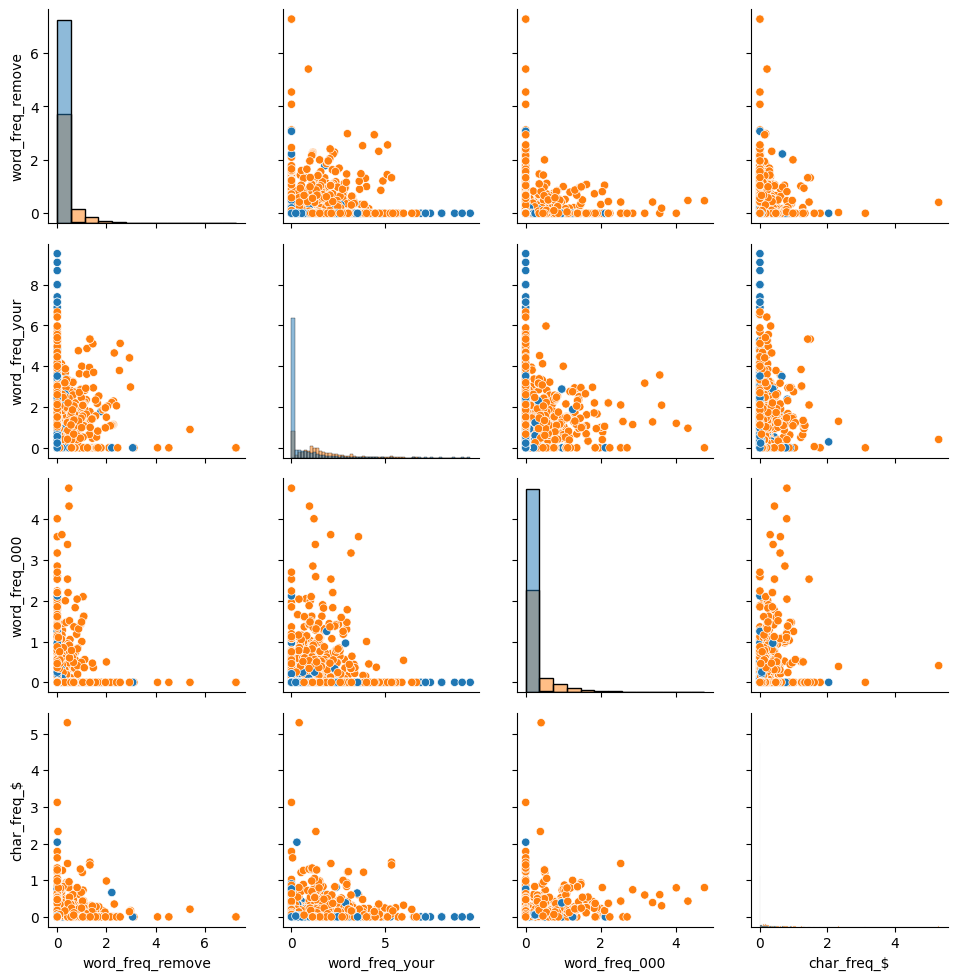

In [160]:
g = sns.PairGrid(X2.join(y['Class']), hue='Class')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

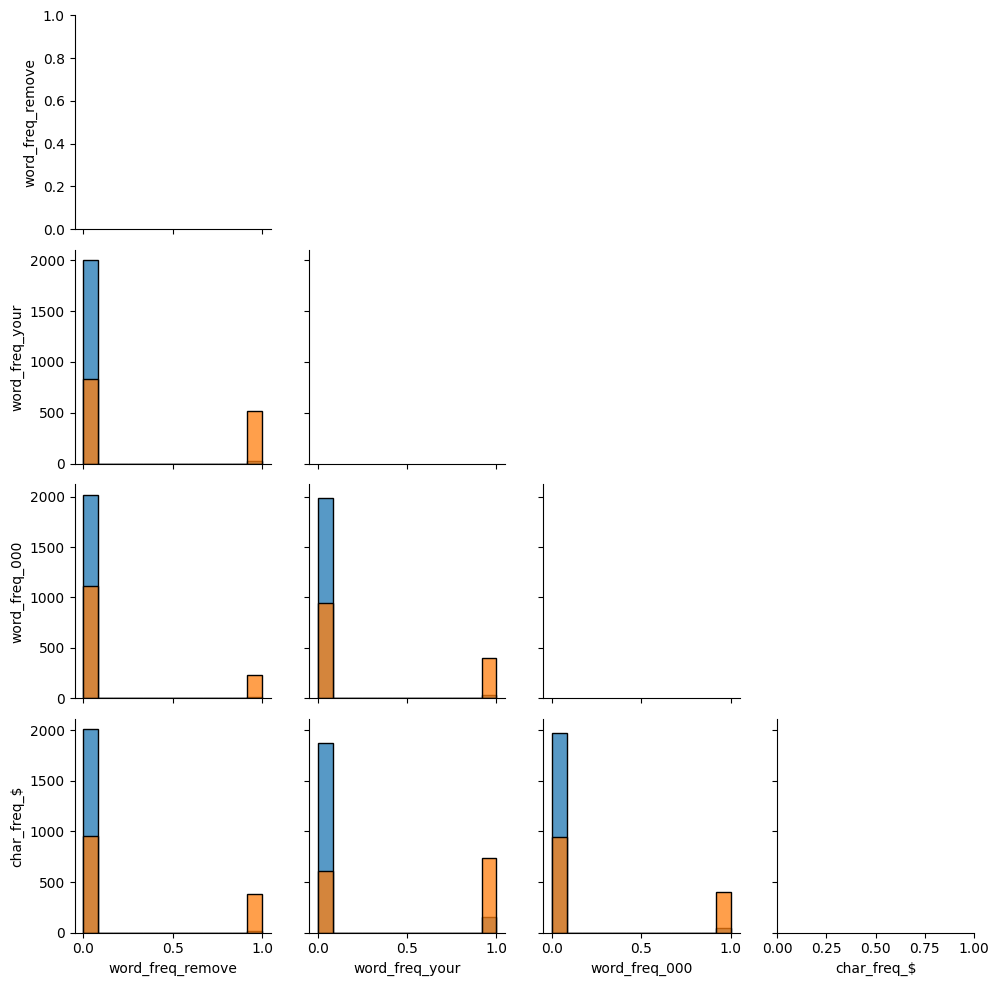

In [254]:
g = sns.PairGrid(X2.join(y['Class']), hue='Class', diag_sharey=False, corner=True)
g.map_lower(lambda x1,x2,*args,**kwargs: sns.histplot((x1*x2 > 0).astype(int), *args, **kwargs))

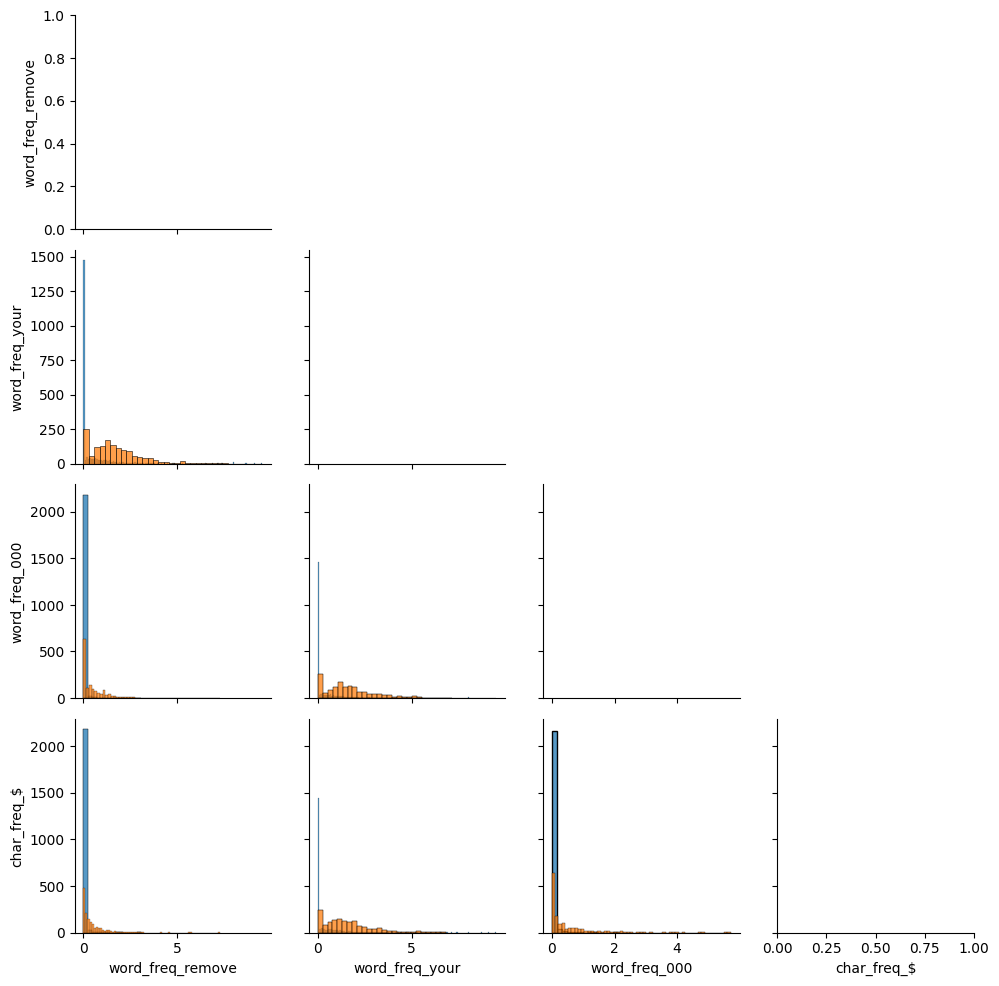

In [170]:
g = sns.PairGrid(X2.join(y['Class']), hue='Class', diag_sharey=False, corner=True)
g.map_lower(lambda x1,x2,*args,**kwargs: sns.histplot(x1+x2, *args, **kwargs))

## Outliers

In [ ]:
sns.boxplot(data=X, x=X.columns, y="age", hue="alive",

/tmp/ipykernel_13/2796869225.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i, figsize=(17,1))


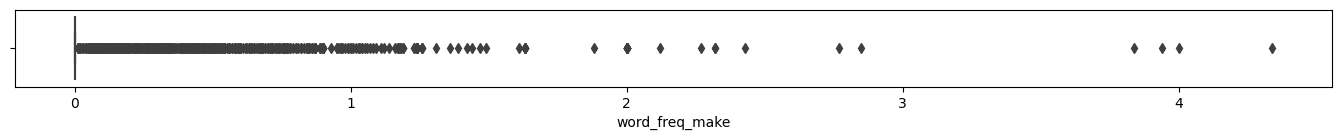

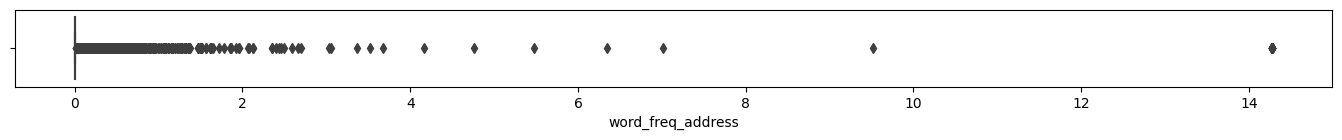

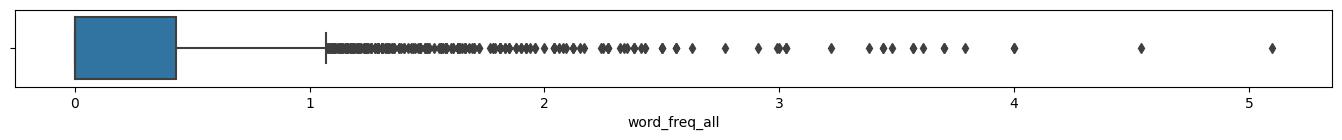

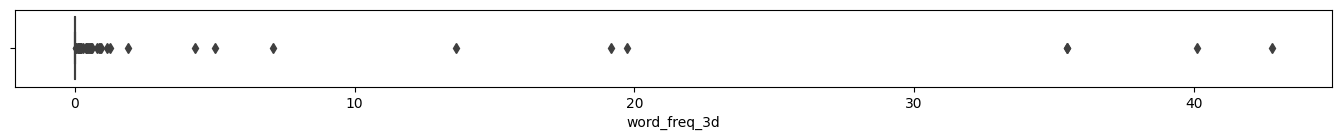

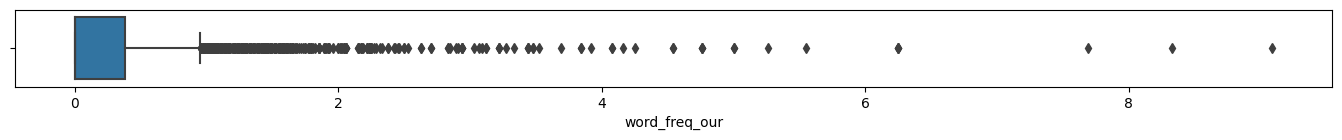

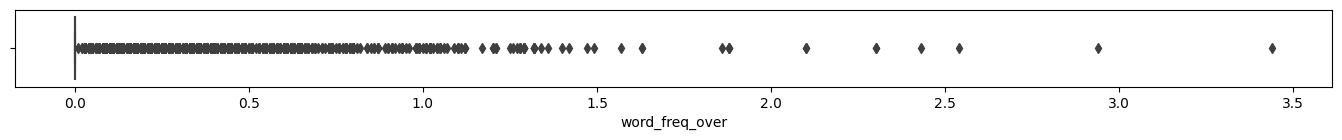

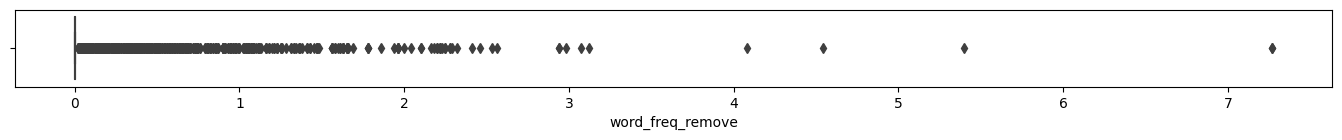

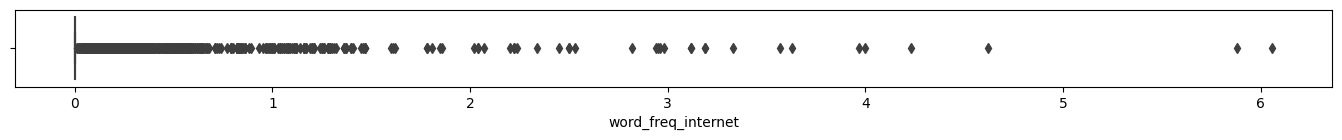

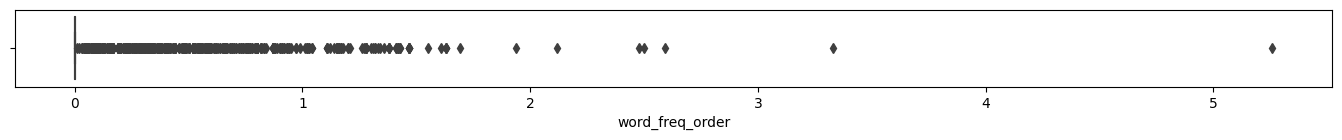

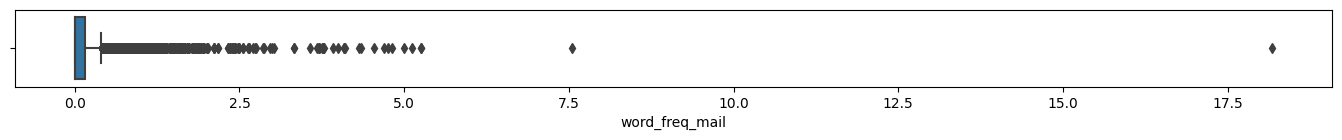

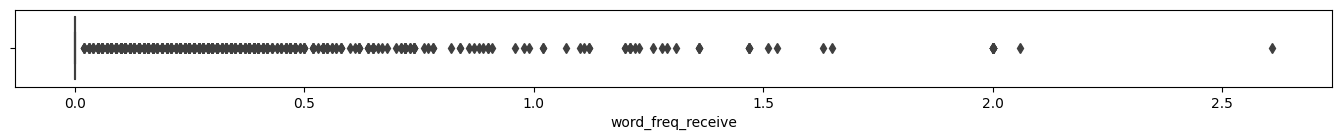

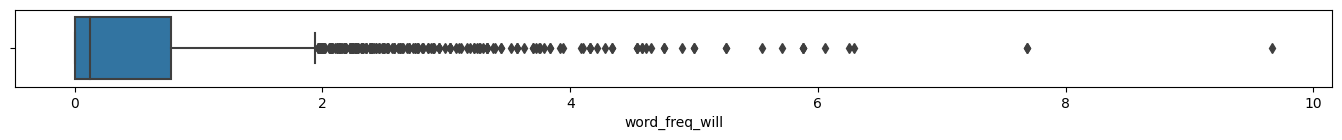

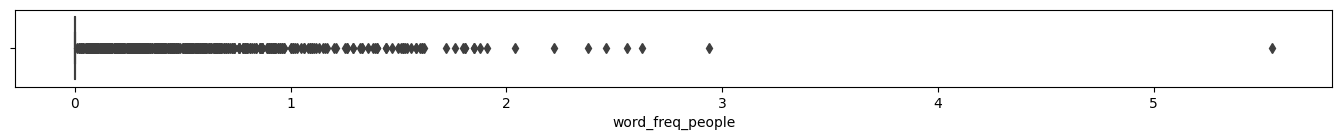

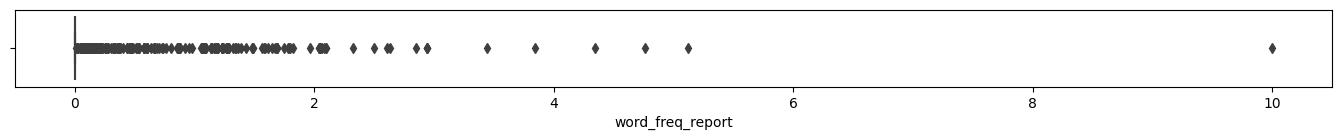

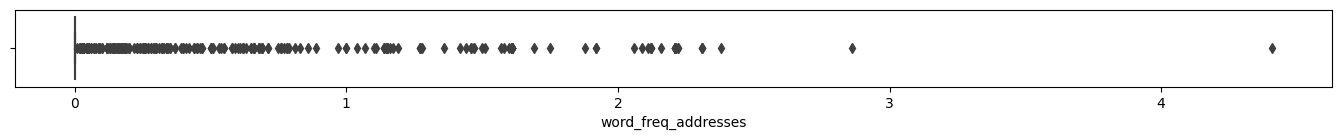

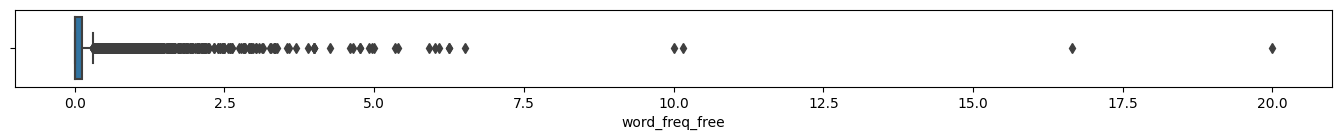

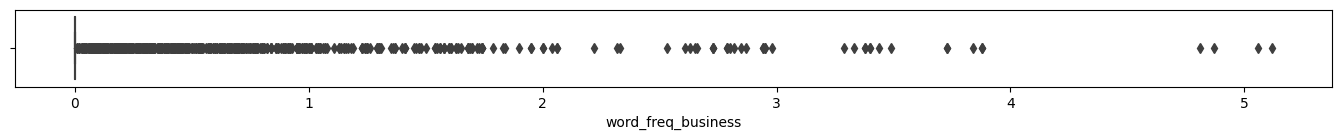

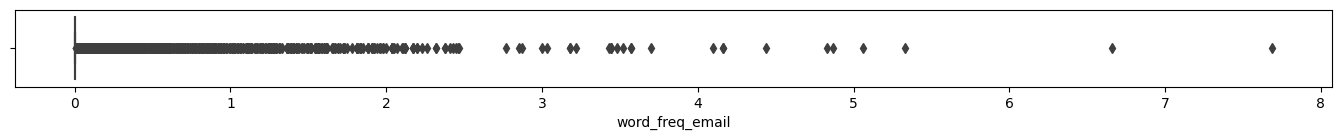

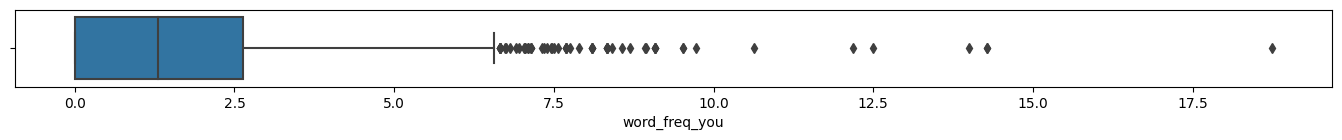

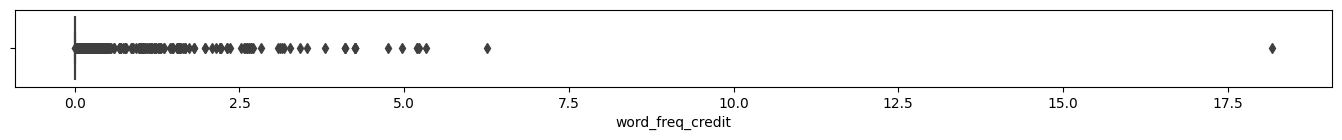

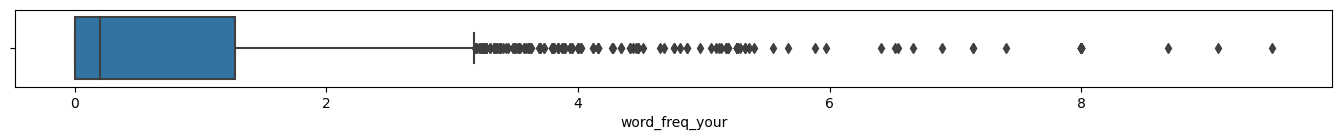

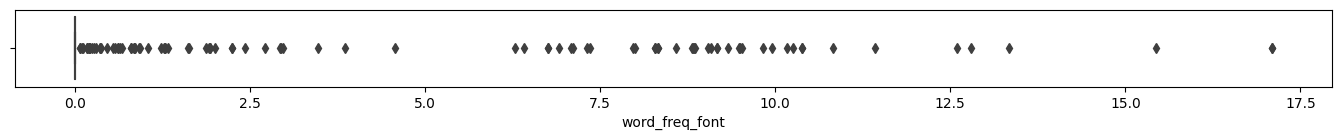

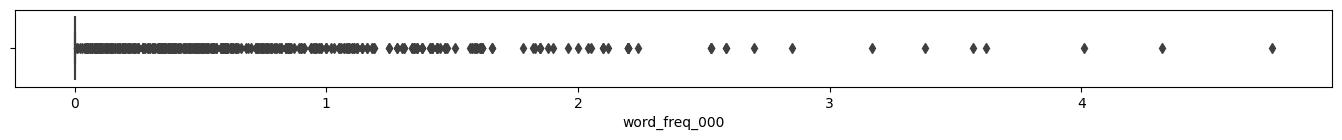

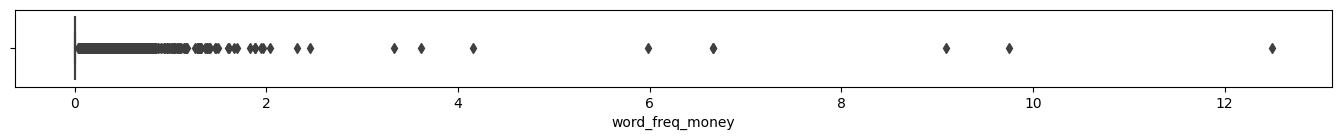

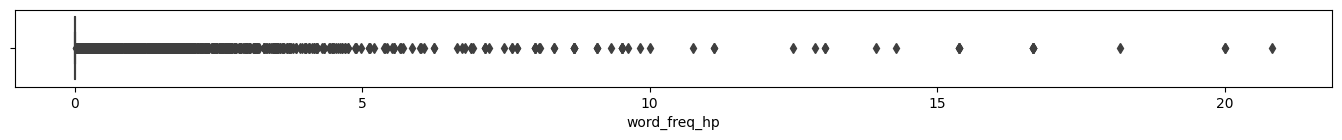

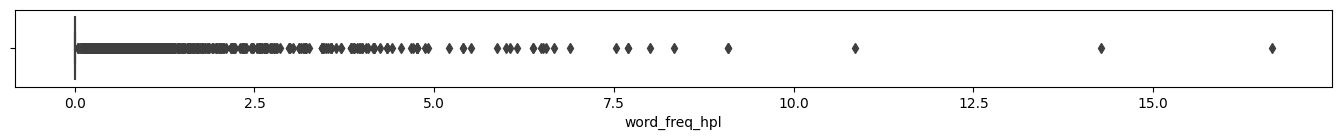

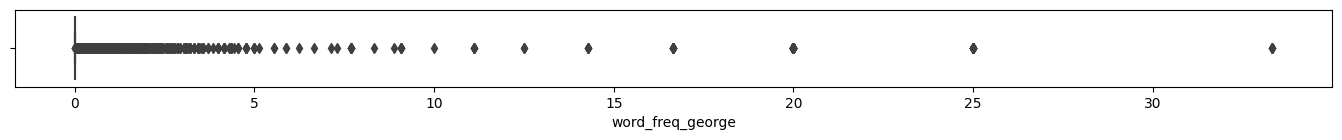

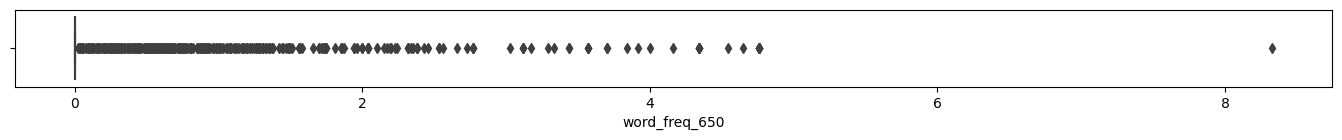

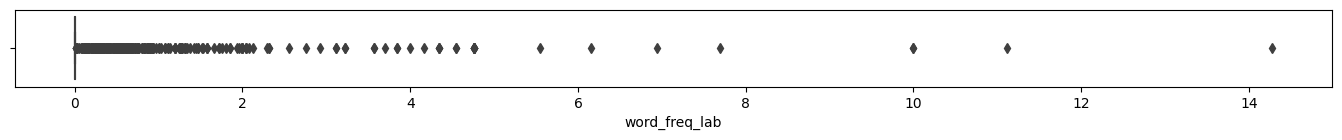

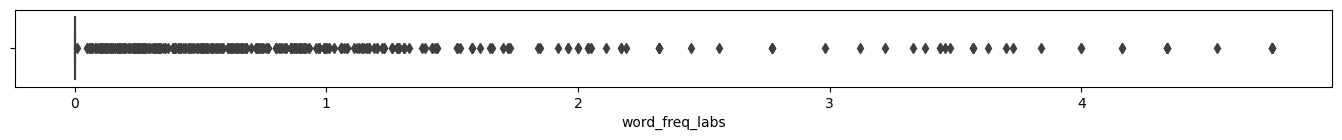

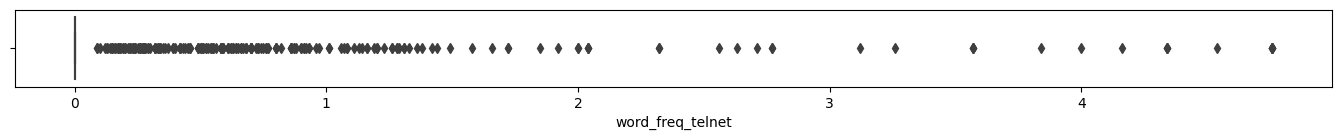

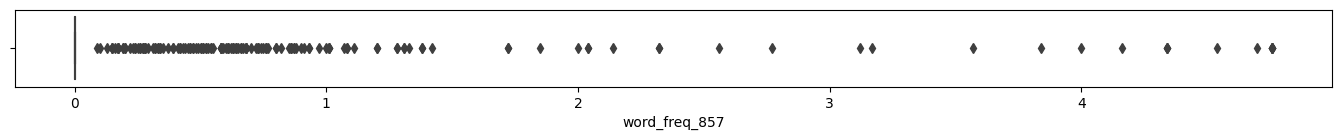

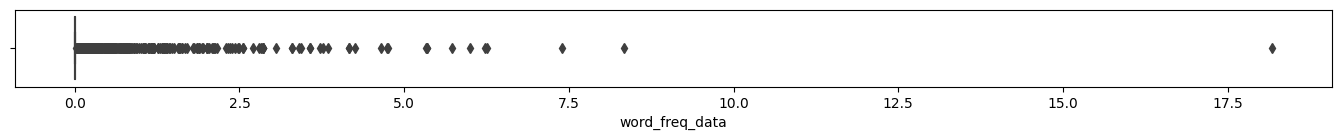

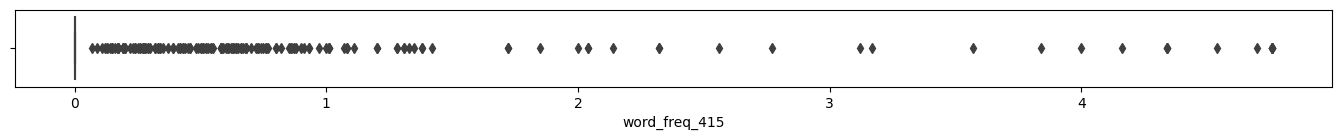

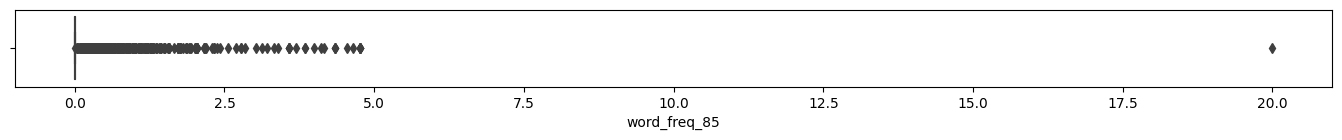

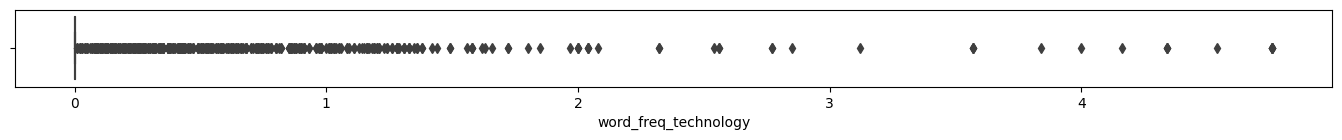

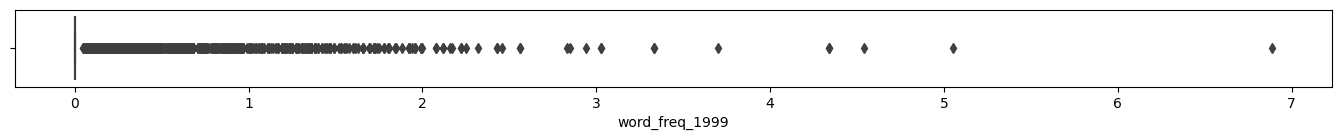

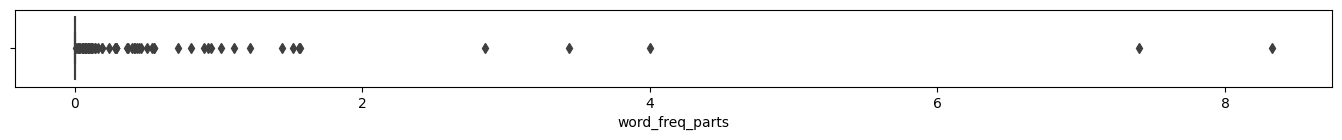

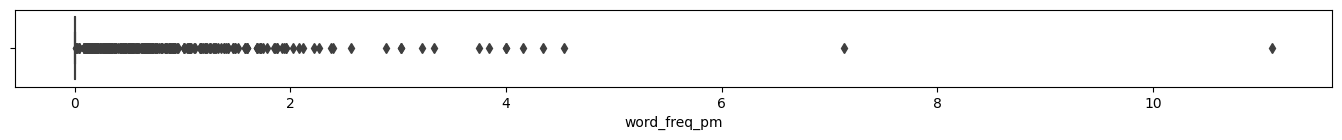

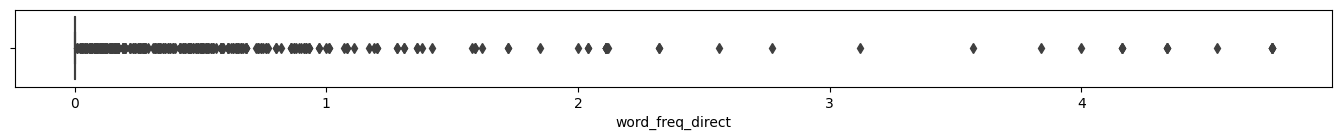

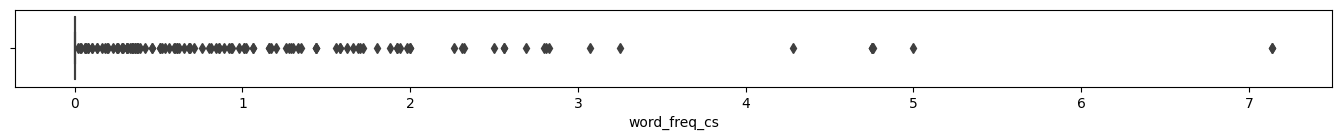

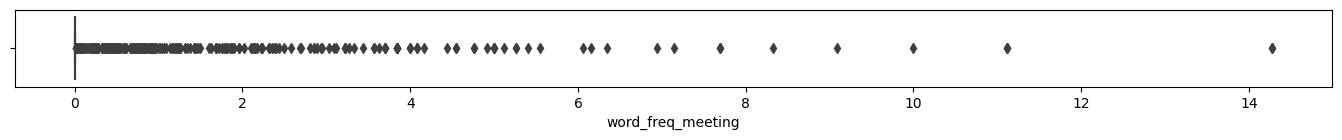

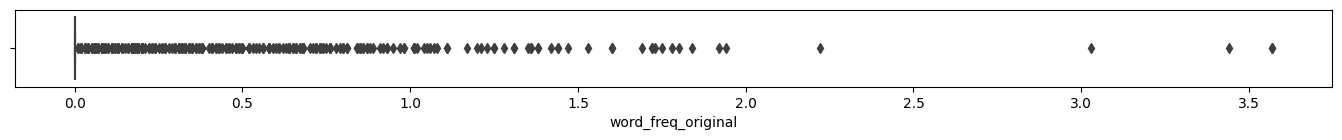

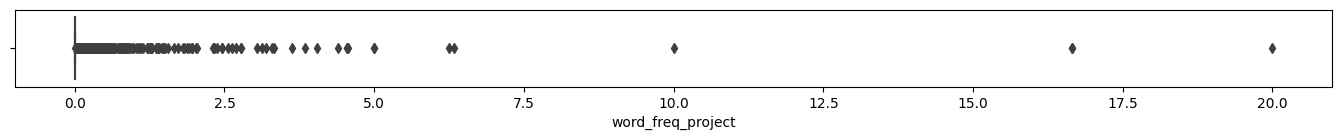

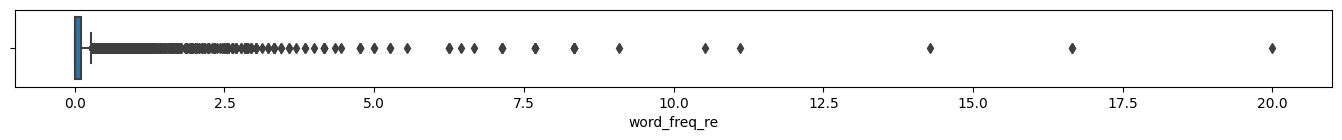

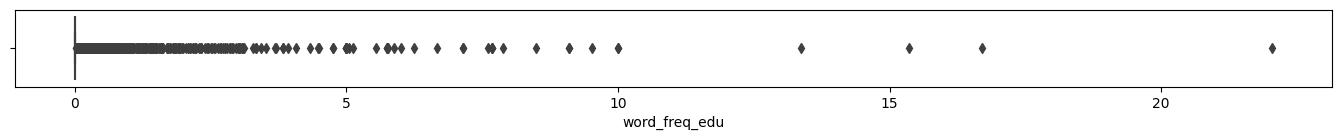

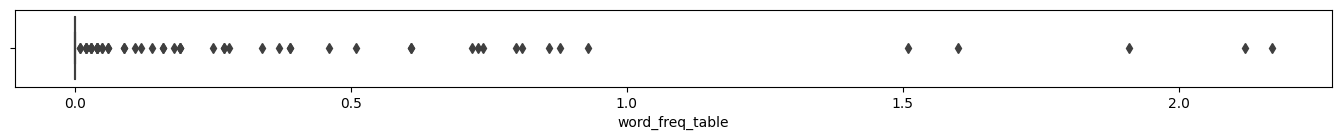

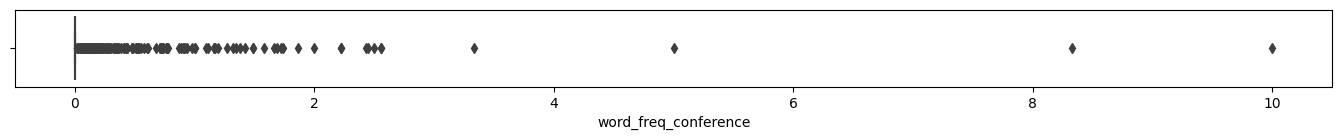

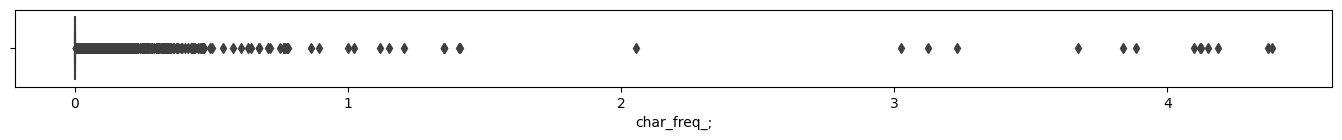

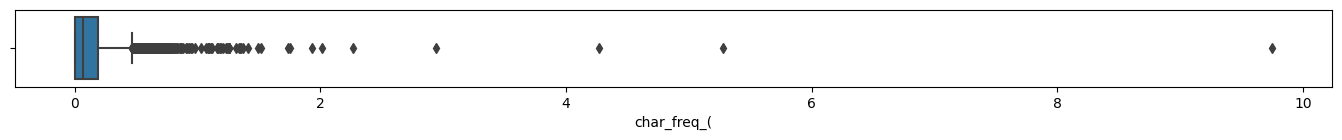

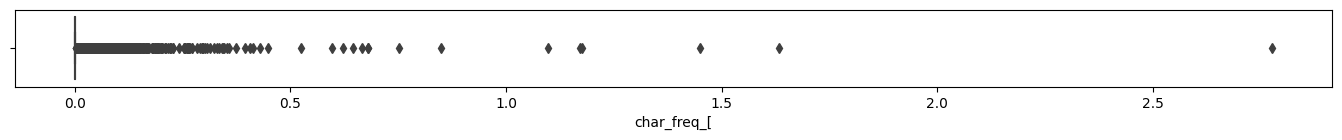

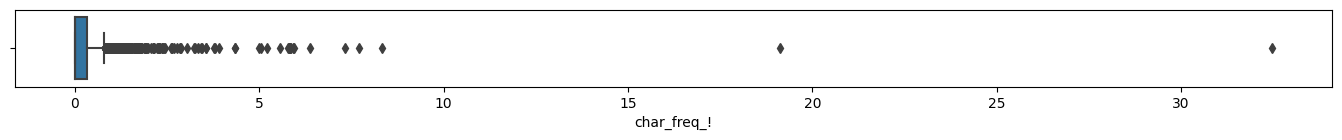

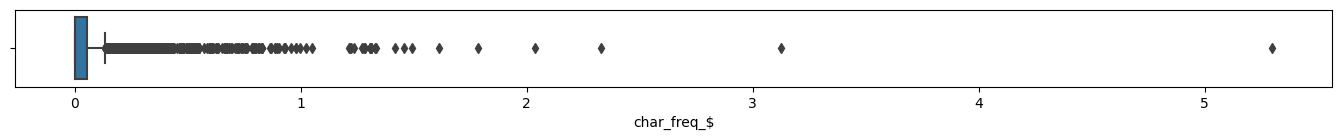

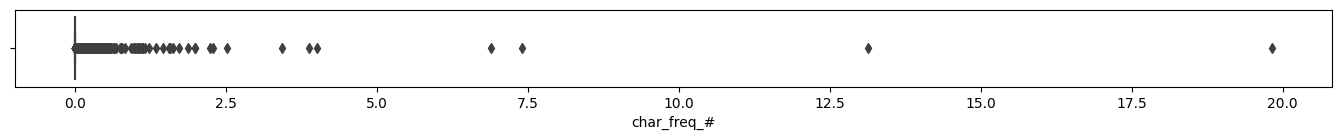

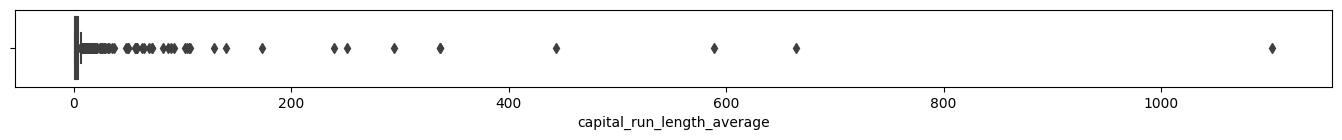

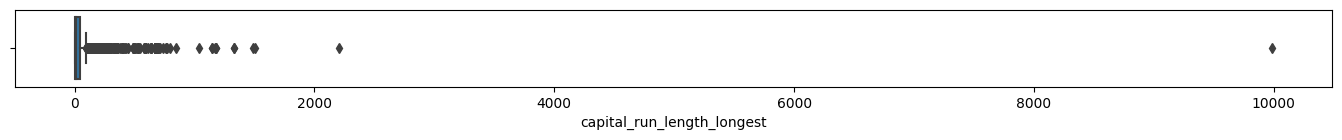

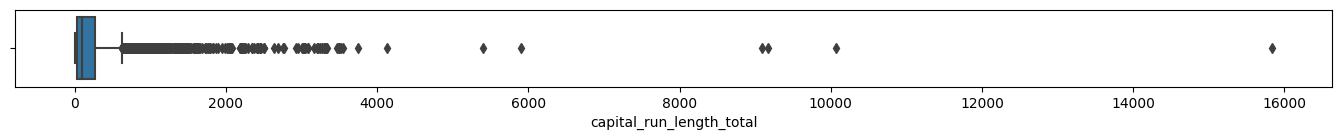

In [209]:
for i, column in enumerate(X):
    plt.figure(i, figsize=(17,1))
    sns.boxplot(data=X, x=column)
plt.show()

/tmp/ipykernel_13/3081838570.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i, figsize=(17,1))


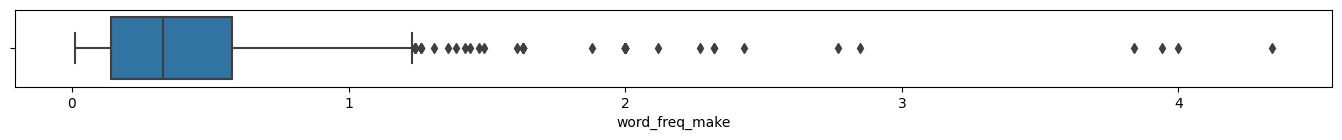

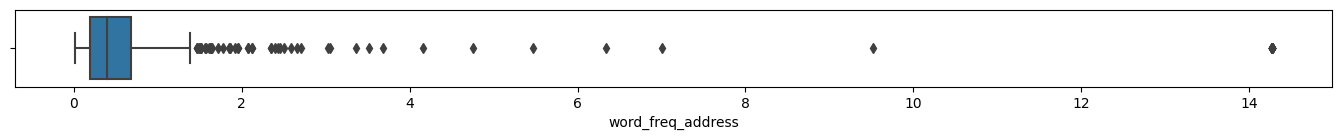

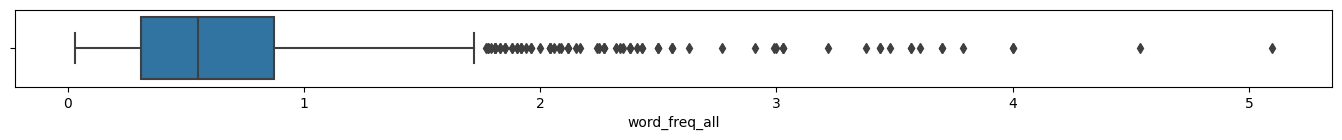

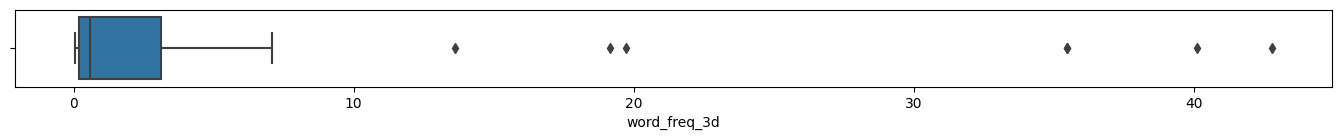

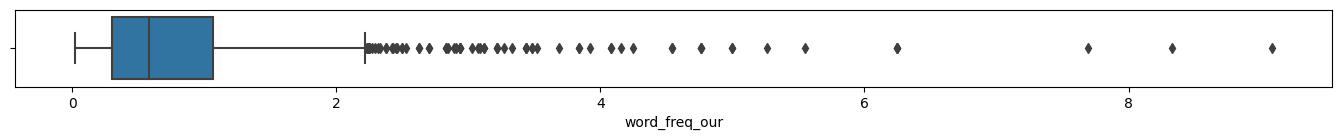

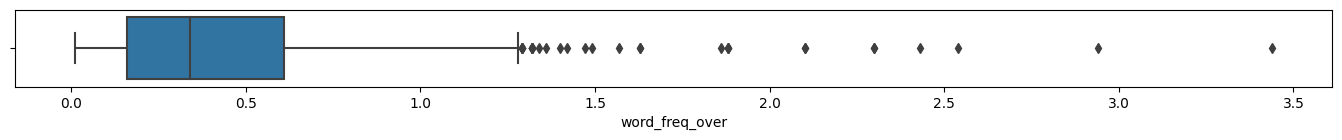

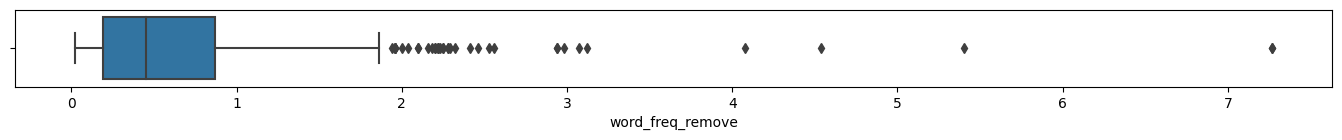

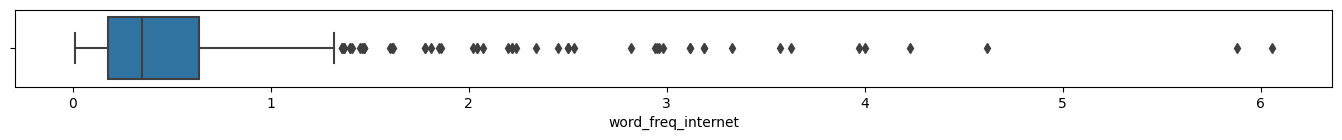

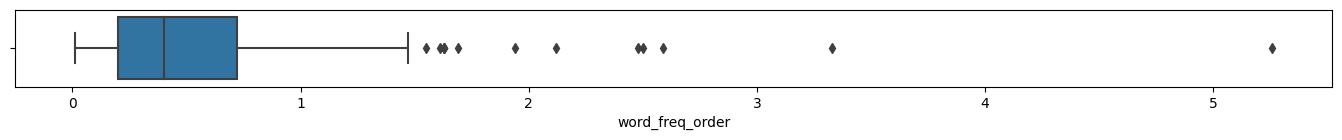

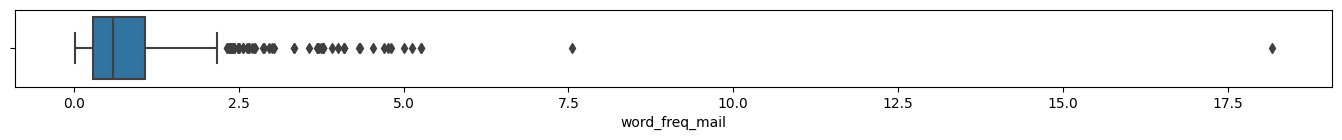

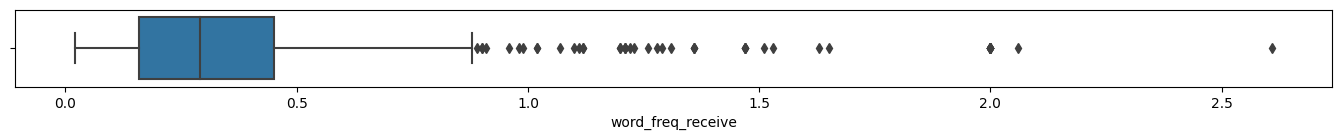

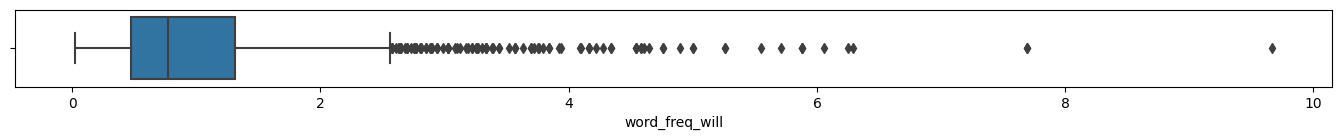

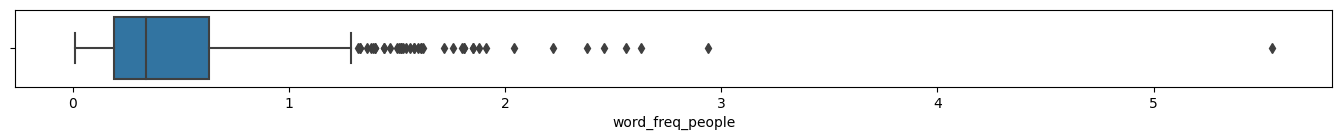

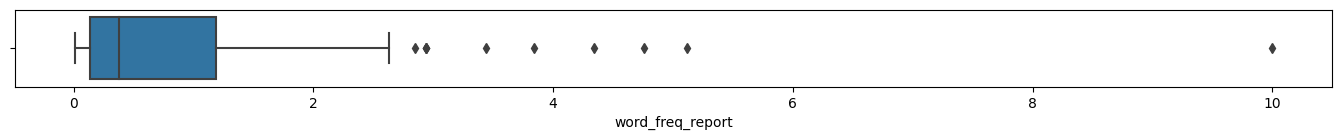

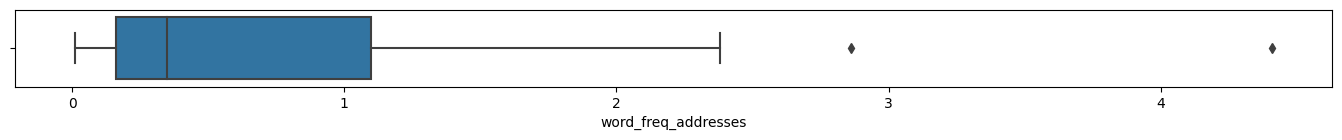

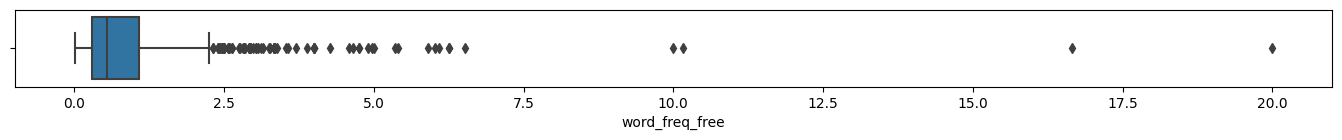

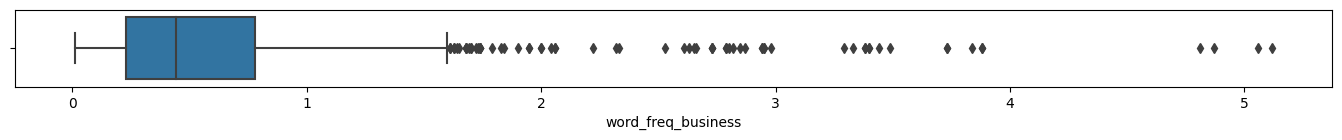

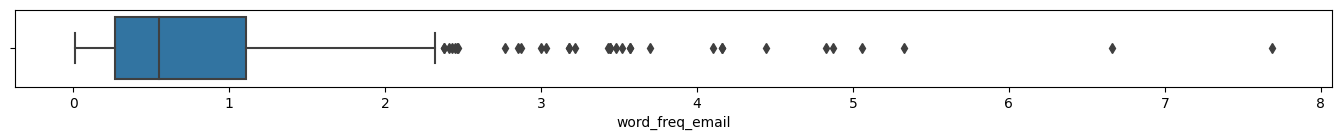

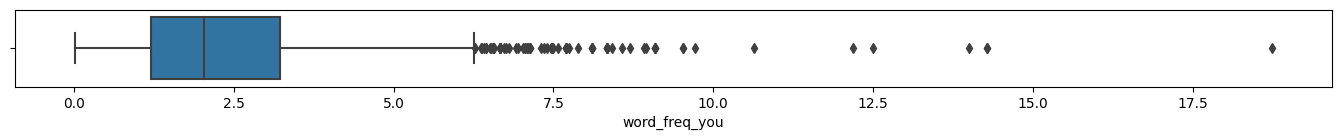

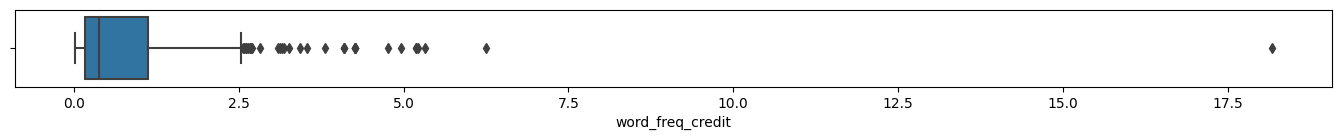

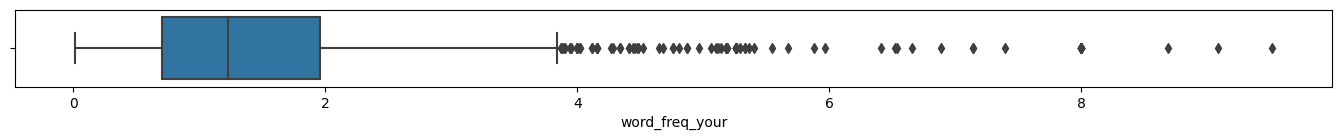

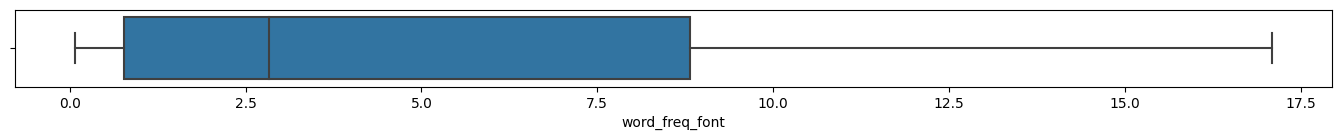

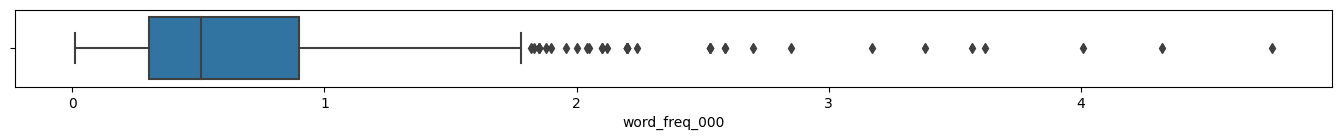

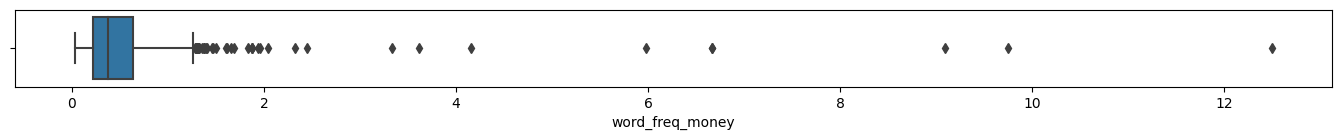

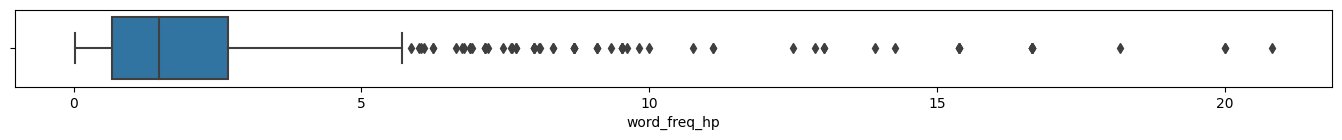

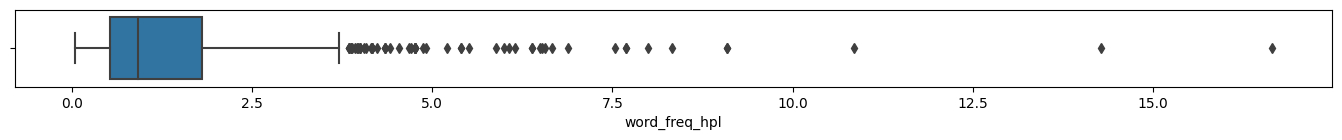

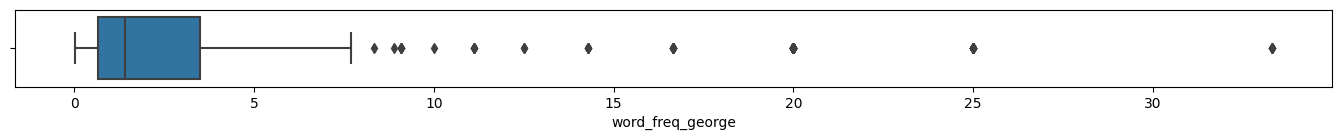

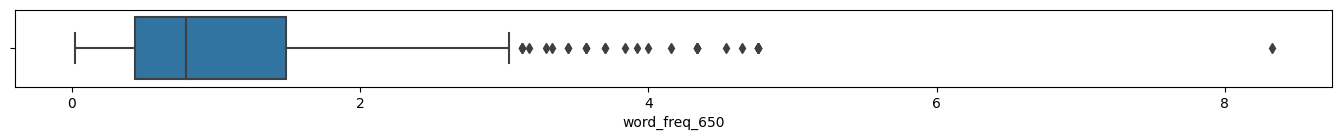

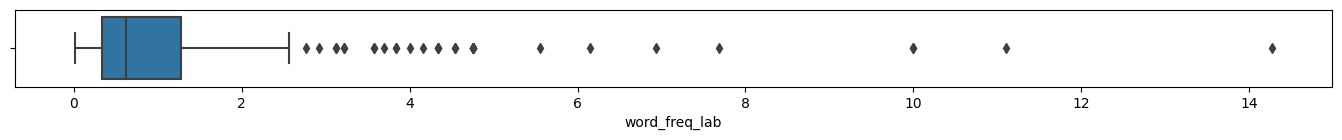

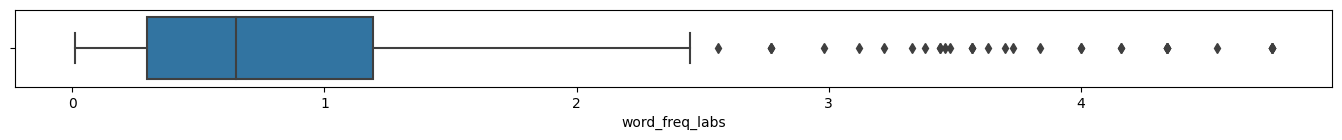

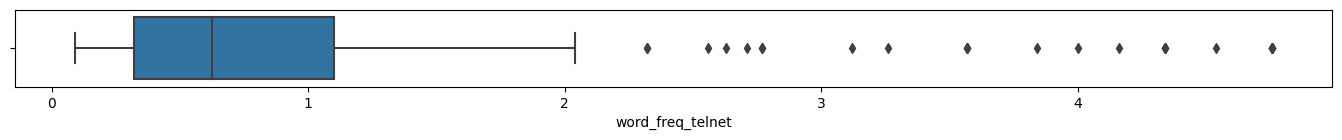

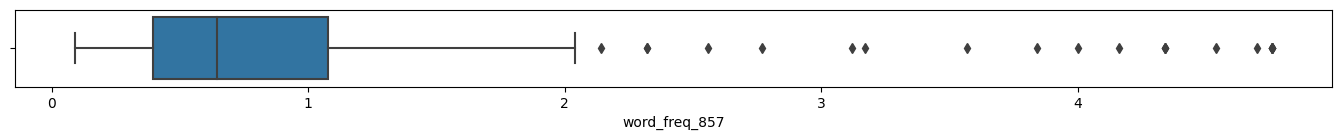

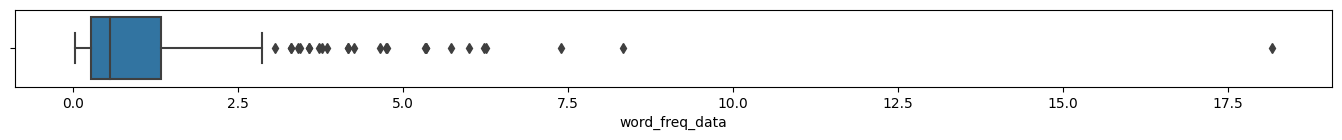

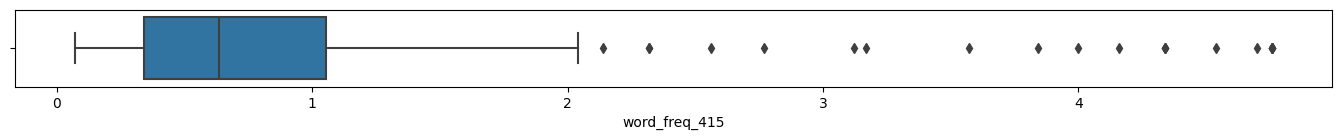

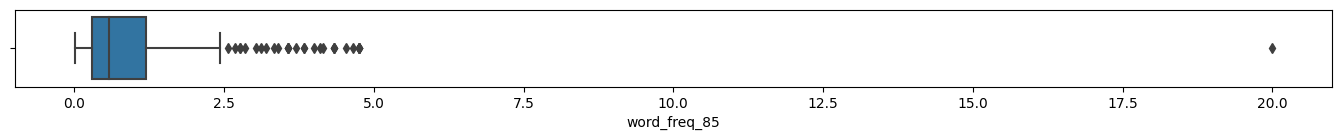

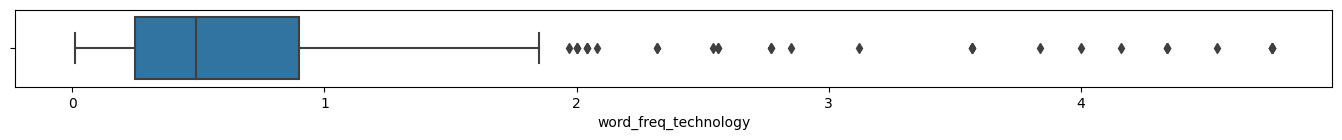

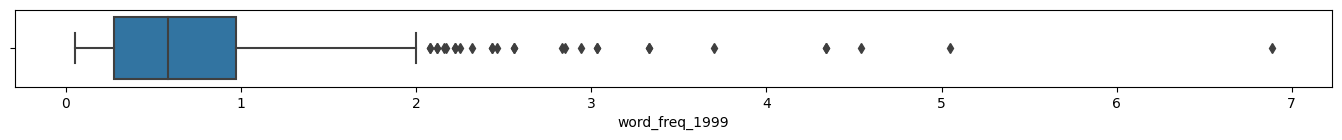

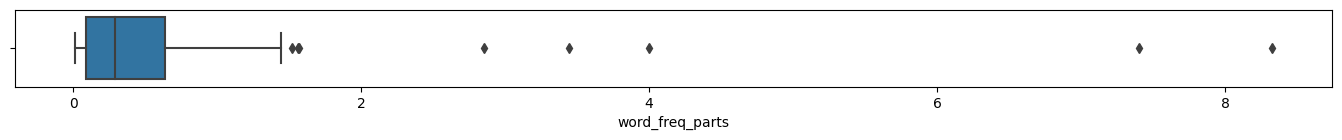

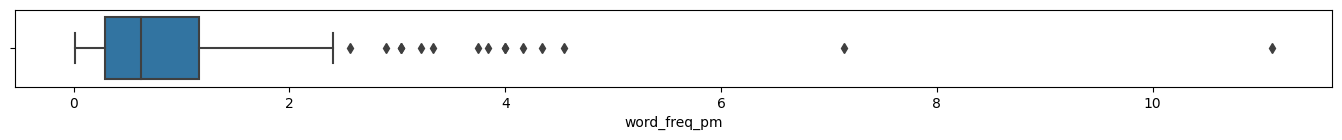

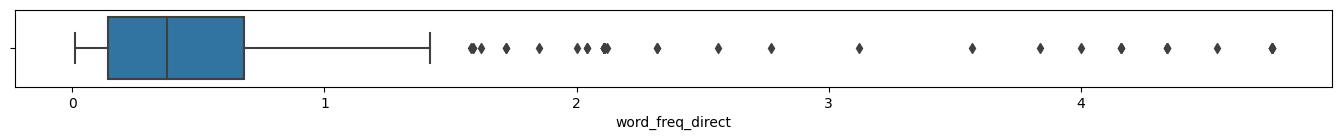

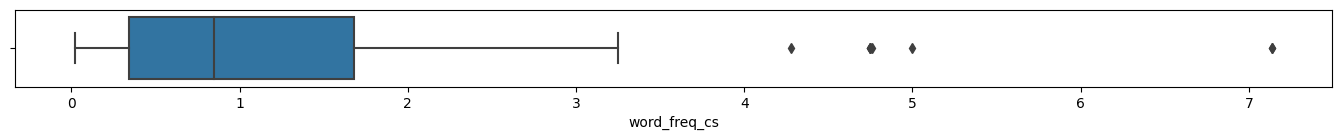

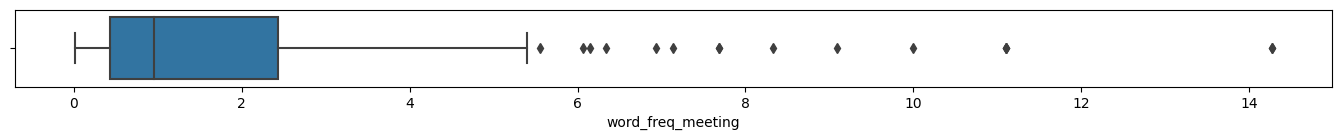

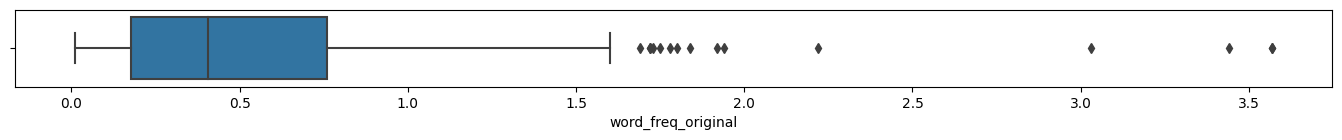

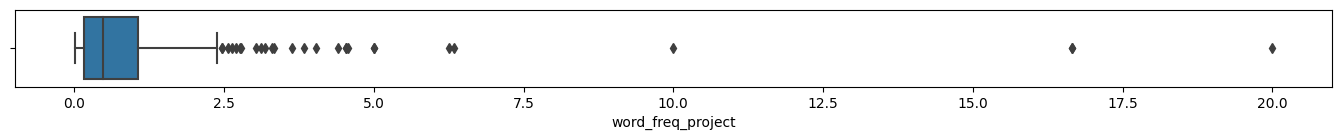

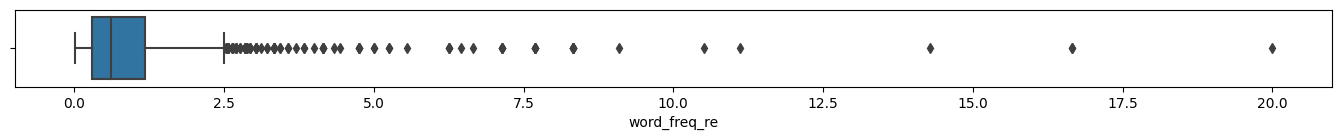

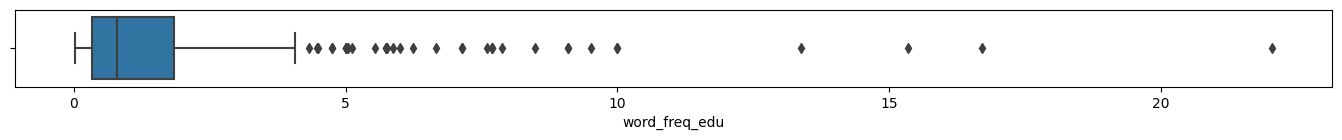

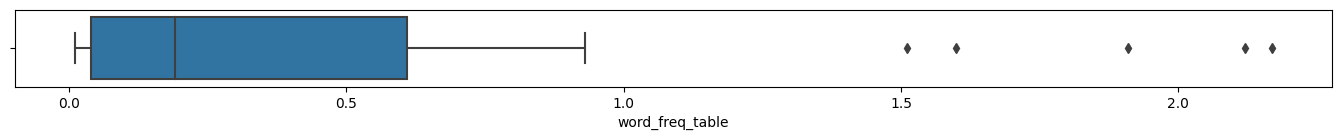

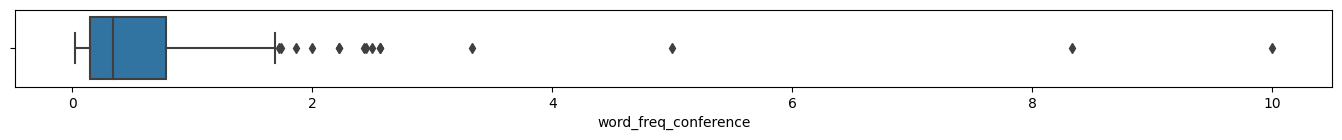

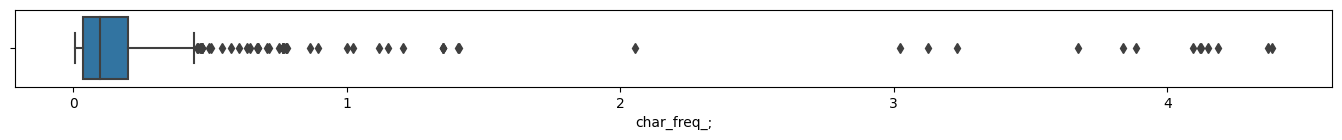

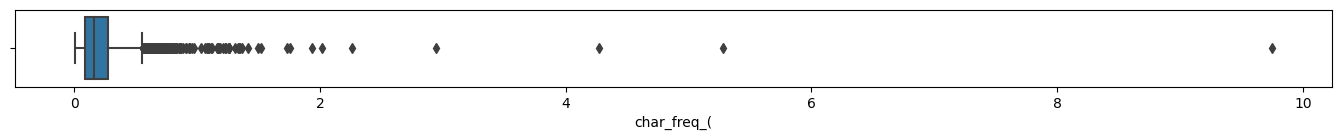

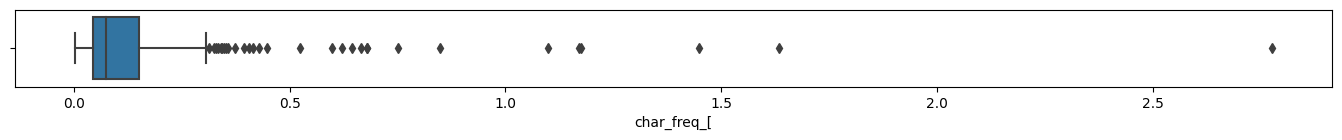

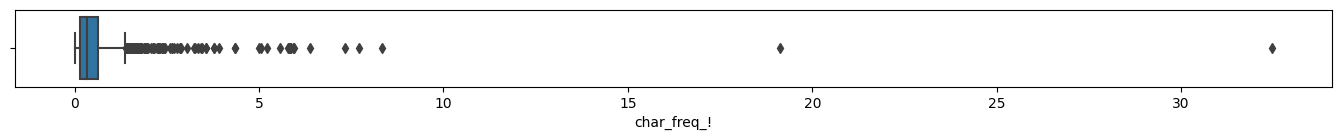

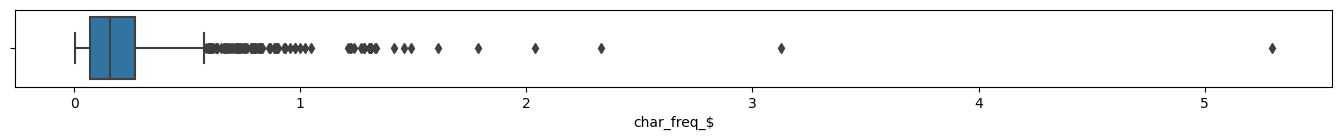

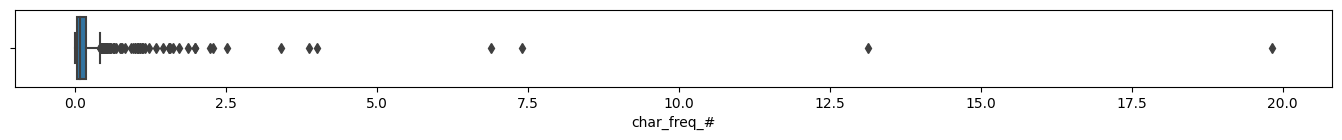

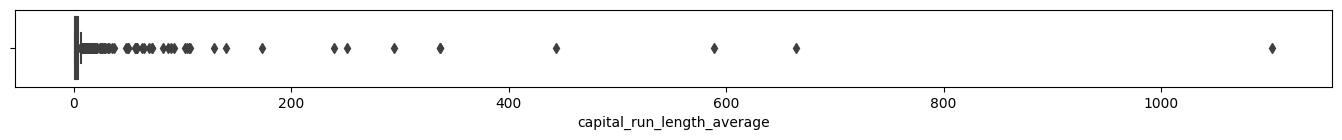

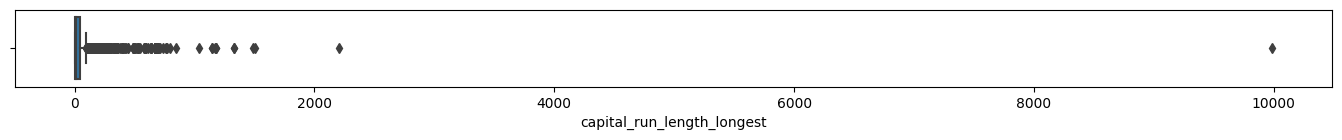

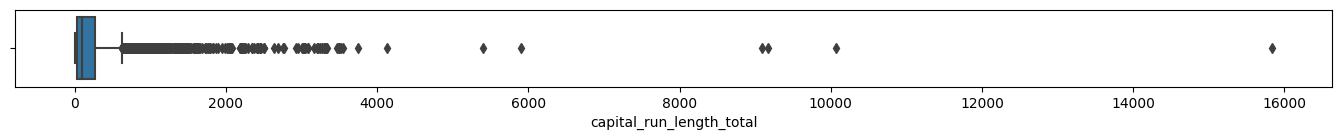

In [208]:
for i, column in enumerate(X):
    plt.figure(i, figsize=(17,1))
    sns.boxplot(data=X[X[column]>0], x=column)
plt.show()

/tmp/ipykernel_13/3774311824.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


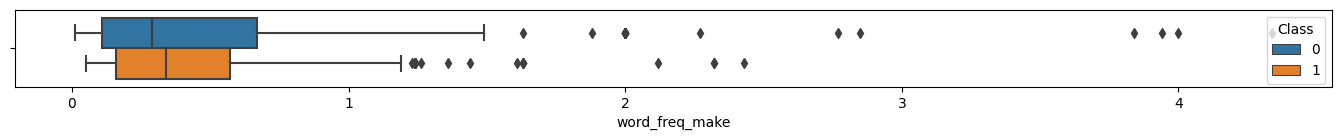

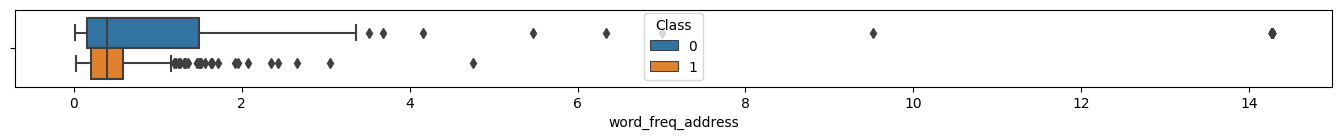

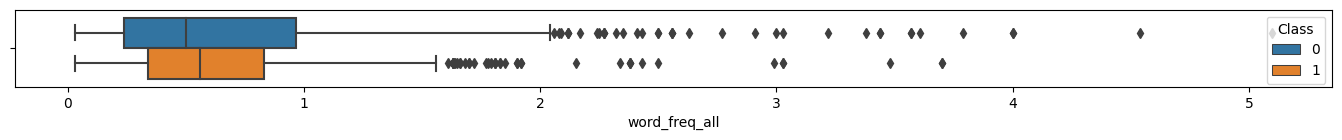

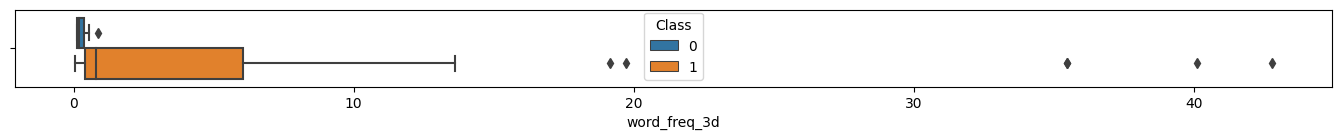

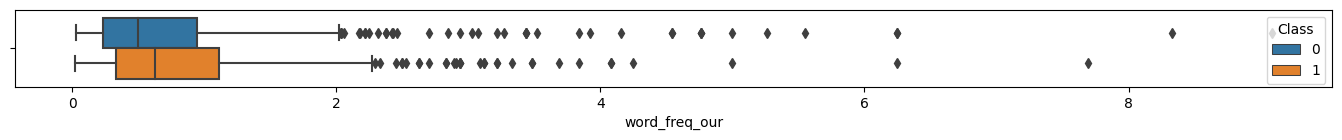

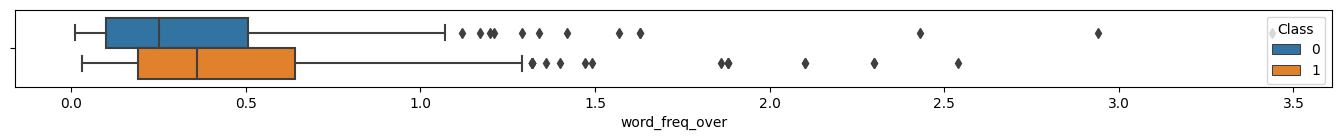

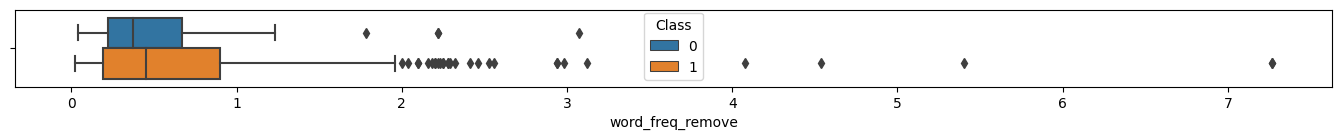

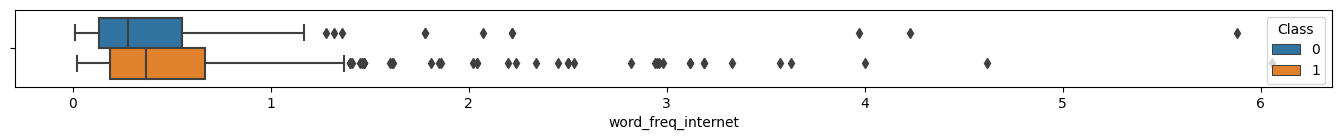

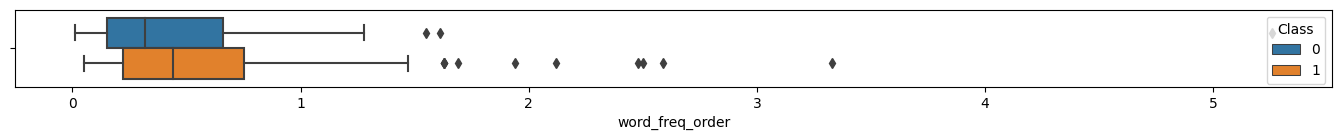

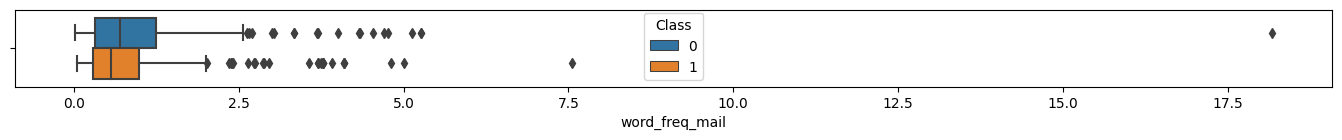

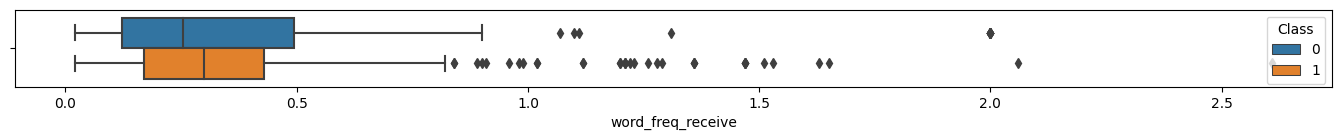

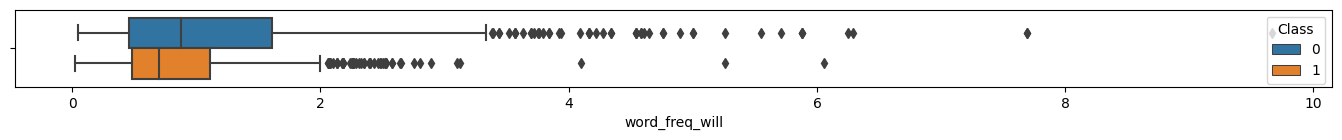

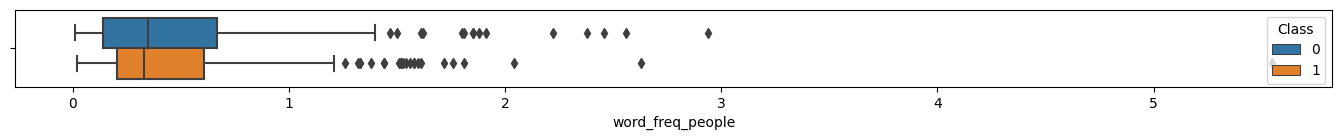

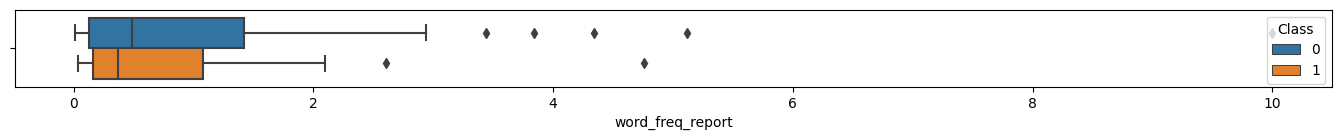

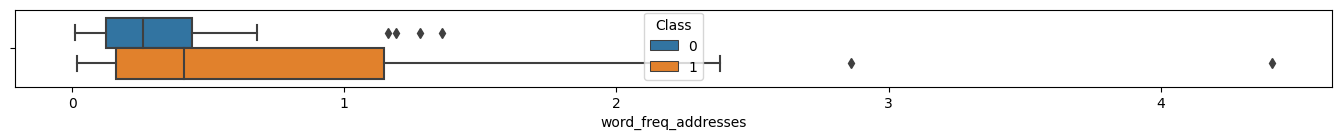

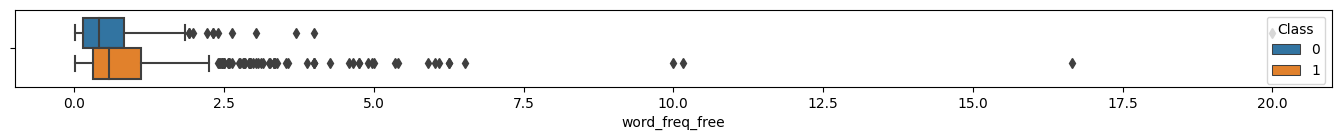

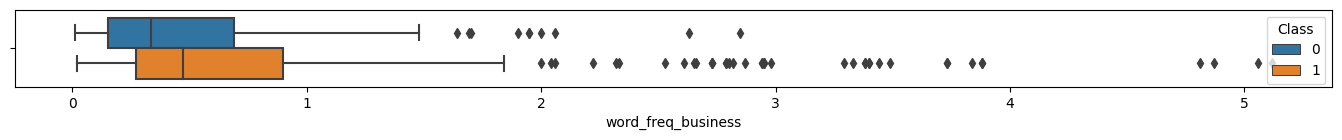

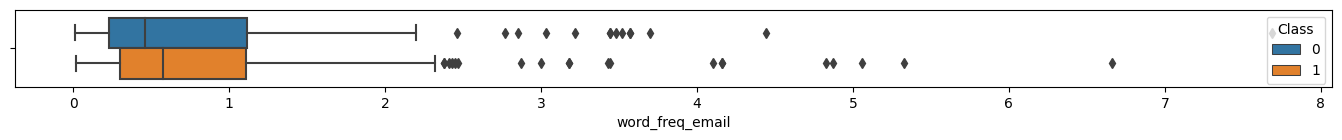

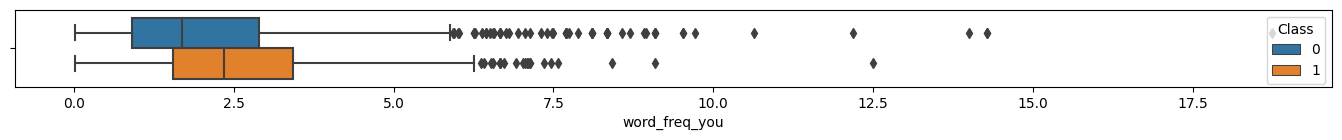

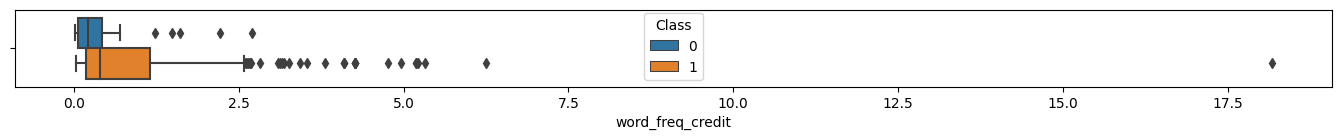

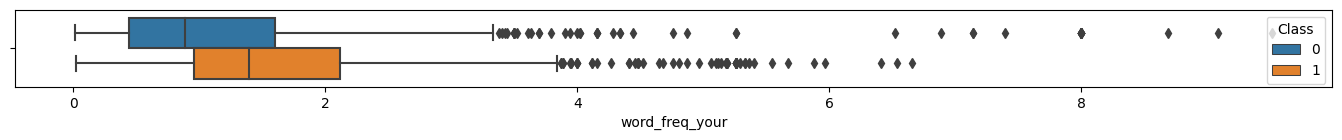

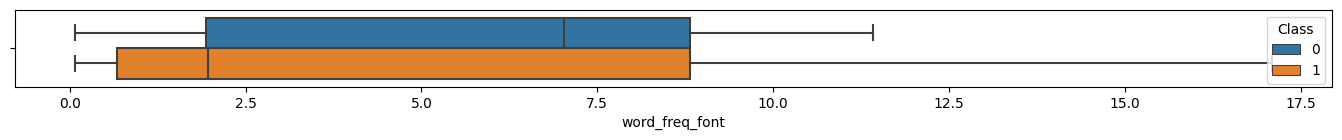

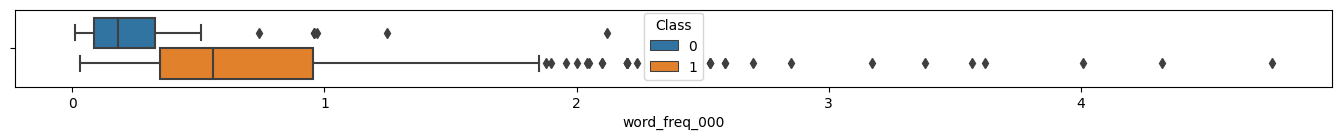

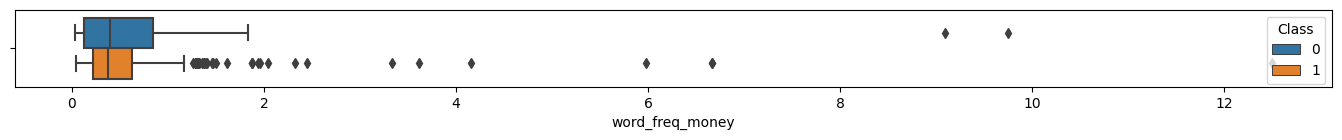

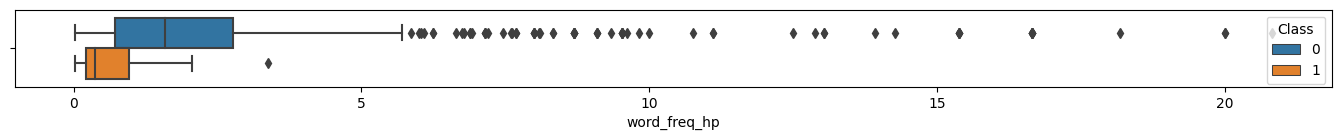

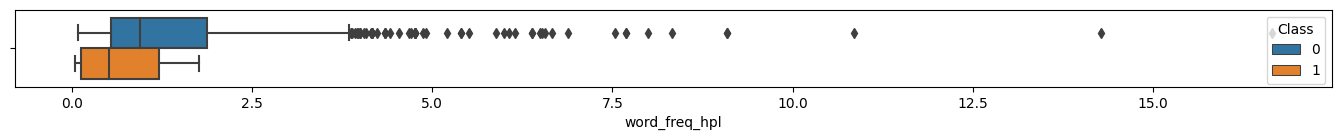

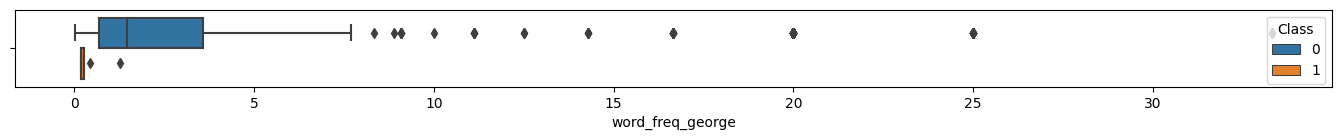

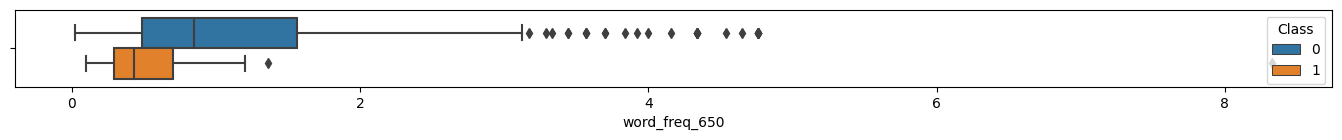

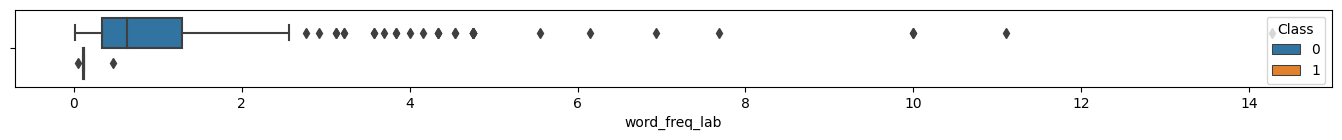

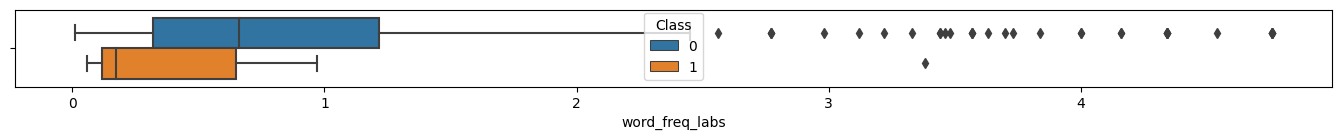

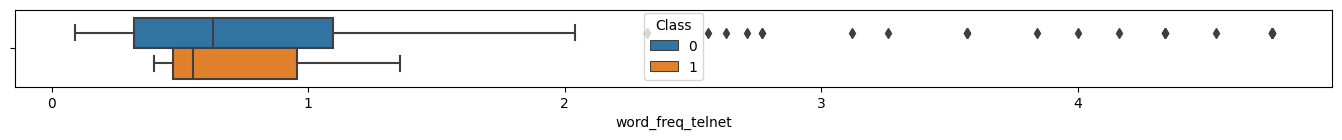

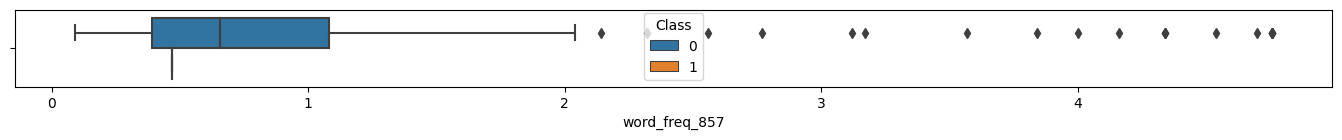

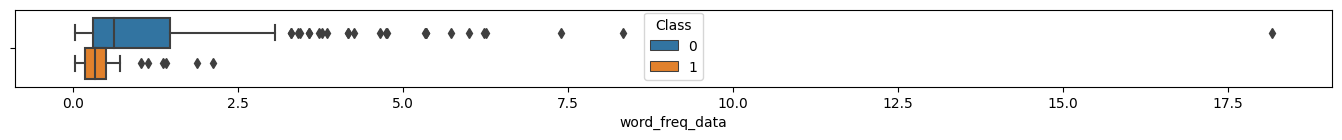

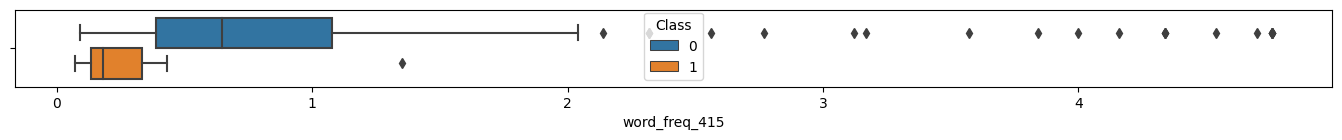

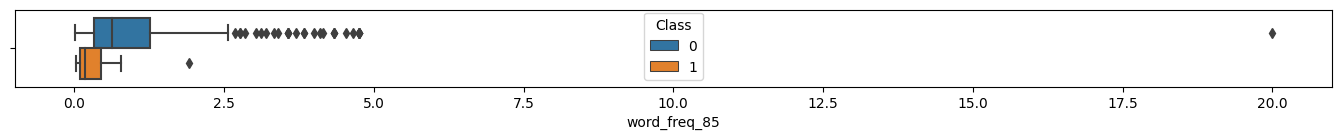

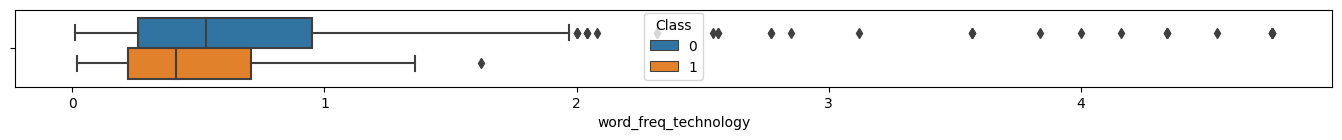

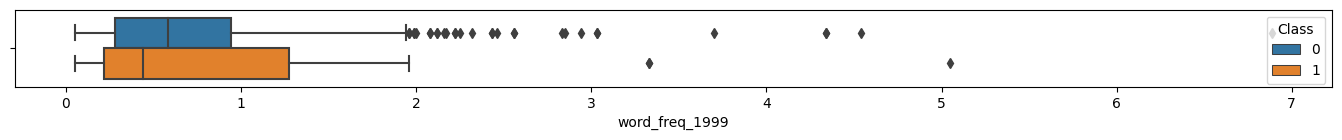

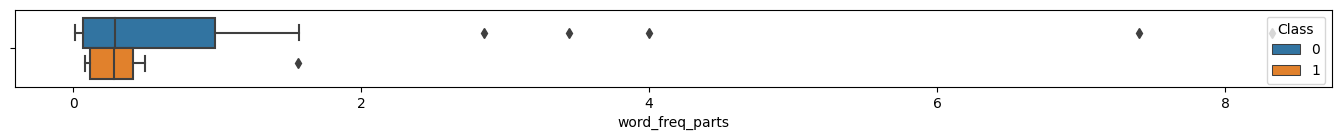

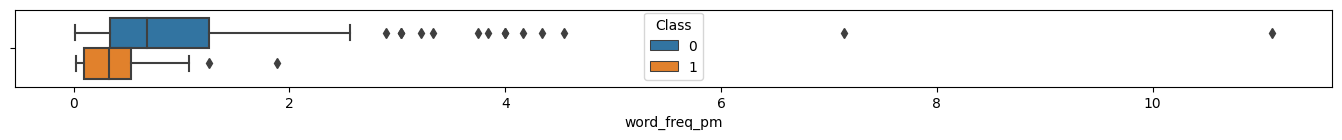

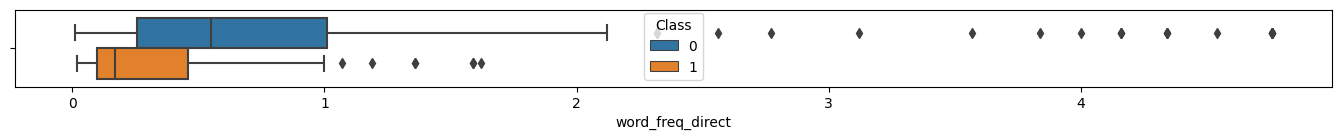

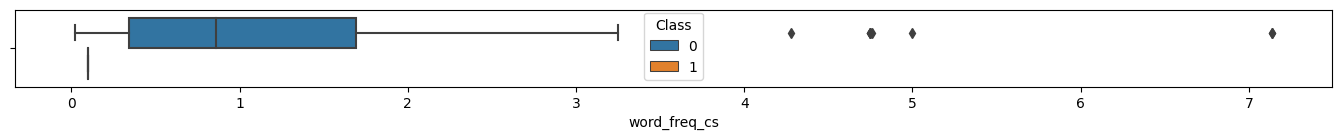

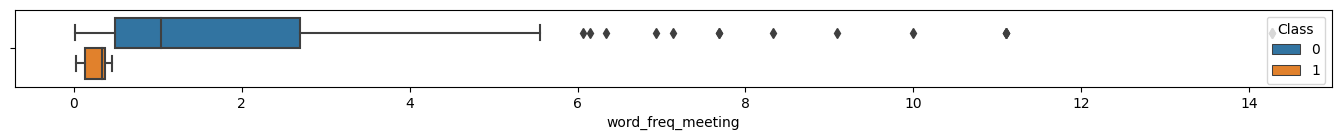

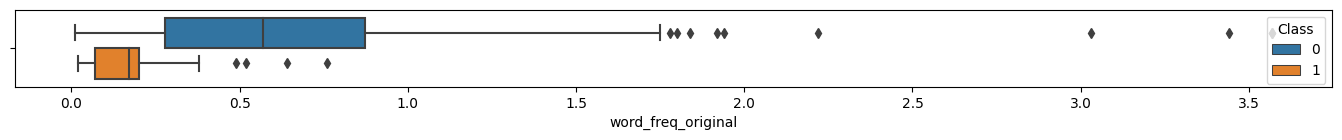

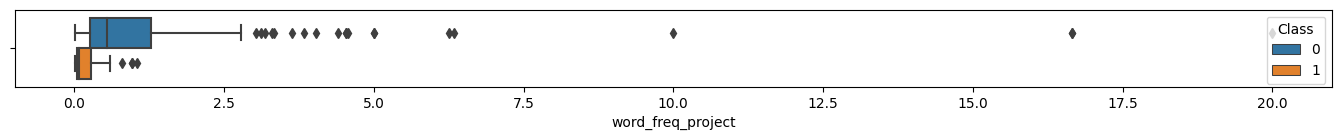

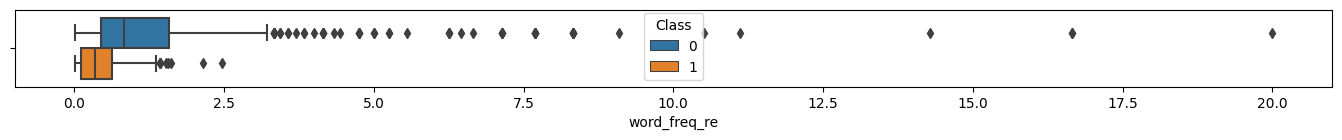

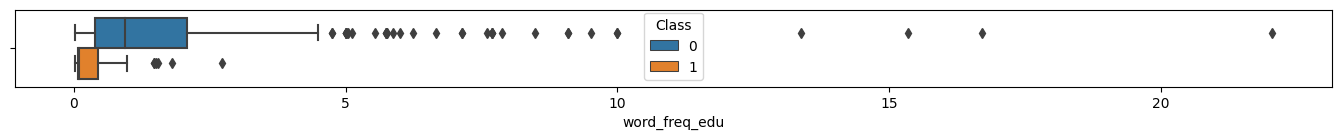

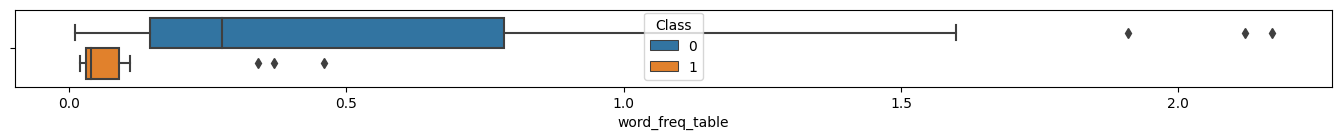

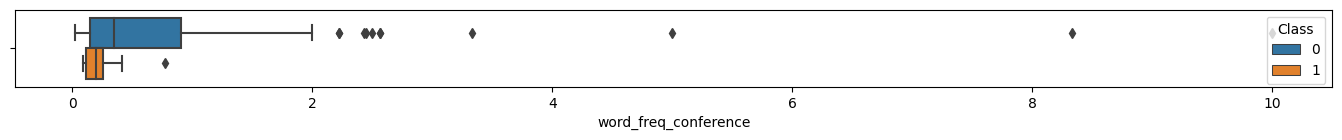

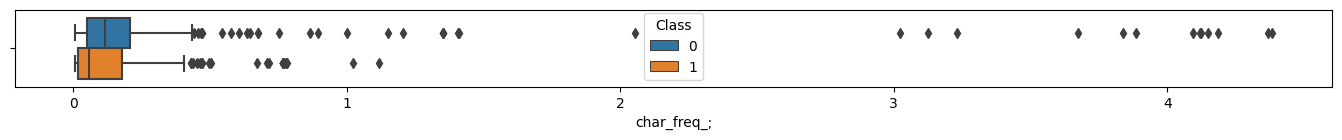

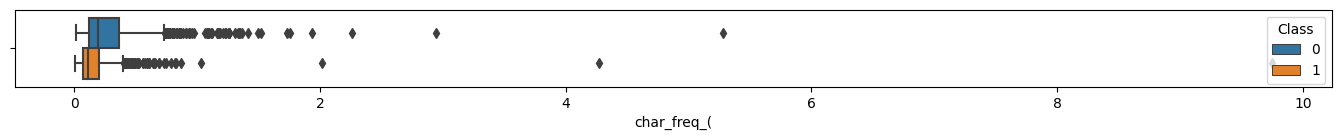

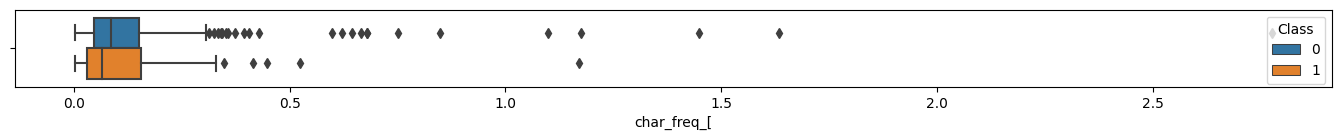

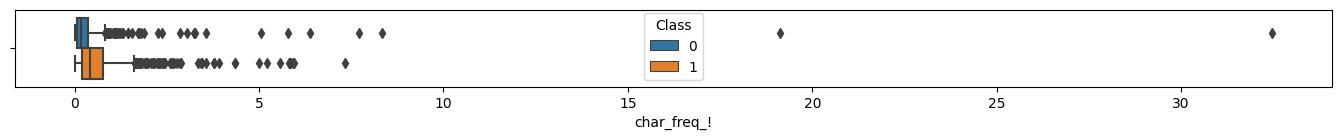

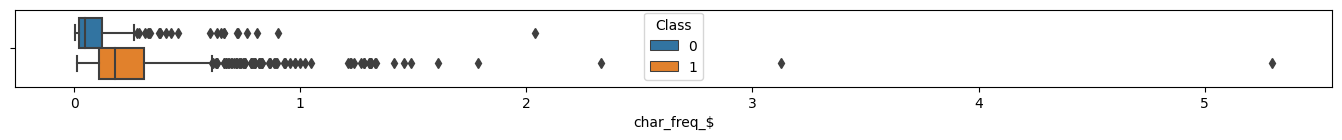

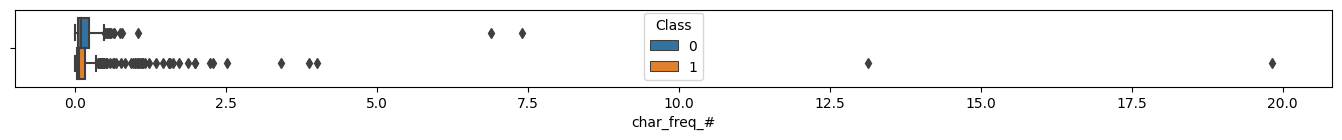

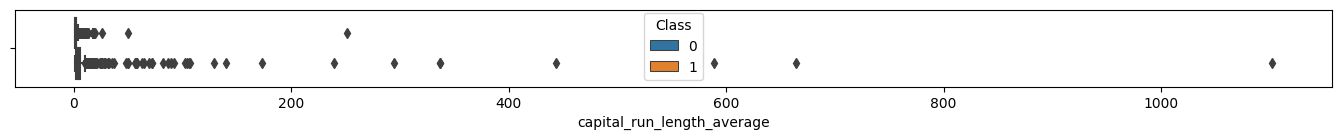

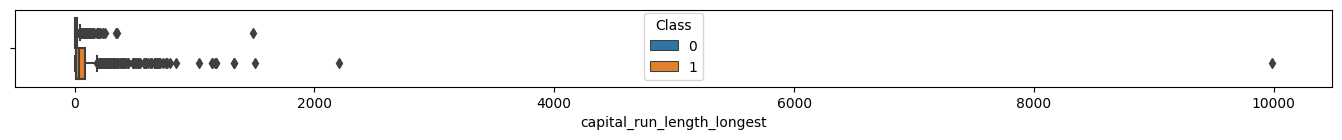

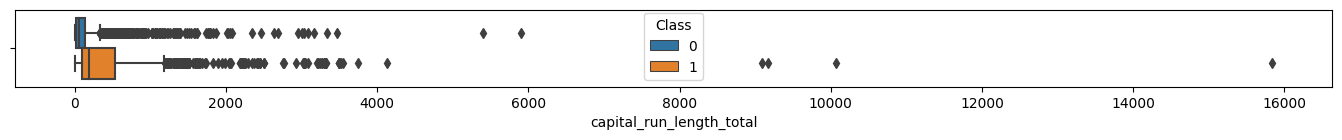

In [218]:
for i, column in enumerate(X):
    plt.figure(figsize=(17,1))
    nonzero = X[column]>0
    empty = ['']*len(X[nonzero])
    sns.boxplot(data=X[nonzero], x=column, y=empty, hue=y[nonzero]['Class'])
plt.show()

In [251]:
outliers = pd.DataFrame(0, index=np.arange(len(X)), columns=X.columns)
outliers_sum = pd.Series(0, index=np.arange(len(X)))
for col in X.columns:
    q = X[X[col]>0][col].quantile(0.99)
    outliers[col] = X[col] > q
    outliers_sum |= X[col] > q
    
display(outliers.sum())
display(outliers.sum().sum())
outliers_sum.sum()

word_freq_make                 8
word_freq_address              7
word_freq_all                 14
word_freq_3d                   1
word_freq_our                 14
word_freq_over                 8
word_freq_remove               7
word_freq_internet             7
word_freq_order                6
word_freq_mail                10
word_freq_receive              6
word_freq_will                18
word_freq_people               7
word_freq_report               3
word_freq_addresses            3
word_freq_free                10
word_freq_business             8
word_freq_email                8
word_freq_you                 25
word_freq_credit               4
word_freq_your                19
word_freq_font                 0
word_freq_000                  5
word_freq_money                6
word_freq_hp                   7
word_freq_hpl                  7
word_freq_george               4
word_freq_650                  4
word_freq_lab                  3
word_freq_labs                 3
word_freq_

458

377

## Further connection tests

In [92]:
corrs

word_freq_hp                 -0.250703
word_freq_hpl                -0.224858
word_freq_george             -0.184252
word_freq_1999               -0.180894
word_freq_labs               -0.170095
word_freq_650                -0.164110
word_freq_85                 -0.143131
word_freq_edu                -0.142765
word_freq_re                 -0.141870
word_freq_original           -0.134975
word_freq_meeting            -0.134542
word_freq_telnet             -0.133579
word_freq_technology         -0.133244
word_freq_lab                -0.129807
word_freq_pm                 -0.121560
word_freq_data               -0.115881
word_freq_857                -0.111910
word_freq_415                -0.110268
word_freq_cs                 -0.100815
word_freq_project            -0.087210
word_freq_conference         -0.081166
char_freq_(                  -0.078027
char_freq_[                  -0.071173
word_freq_direct             -0.065570
char_freq_;                  -0.060803
word_freq_table          

In [99]:
from sklearn.feature_selection import mutual_info_classif
#X.corrwith(y['Class'], method=).T.sort_values(by=0)
pd.Series(mutual_info_classif(X,y['Class']), index=X.columns).sort_values()

word_freq_font                0.000000
word_freq_parts               0.000000
word_freq_3d                  0.000082
word_freq_table               0.003435
word_freq_cs                  0.007774
char_freq_[                   0.011484
word_freq_data                0.013703
word_freq_857                 0.015961
word_freq_415                 0.016770
char_freq_;                   0.016864
word_freq_conference          0.020341
word_freq_pm                  0.026837
word_freq_telnet              0.027760
word_freq_direct              0.027918
word_freq_original            0.028099
word_freq_technology          0.032130
word_freq_people              0.032397
word_freq_report              0.033830
word_freq_project             0.034520
word_freq_meeting             0.035052
word_freq_lab                 0.035176
word_freq_85                  0.036824
word_freq_labs                0.038143
word_freq_addresses           0.038489
word_freq_re                  0.038688
char_freq_#              

In [110]:
from scipy.stats import f_oneway
X.corrwith(y['Class'],method=lambda X,y: f_oneway(X[y==0],X[y==1])).T.sort_values(by=0, ascending=False)

/usr/local/lib/python3.8/dist-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


0         1
word_freq_your              11.439066  0.000735
word_freq_business           6.842748  0.008946
word_freq_000                6.718568  0.009586
word_freq_remove             5.317690  0.021177
word_freq_addresses          3.600844  0.057834
word_freq_hp                 3.027889  0.081954
word_freq_1999               2.501077  0.113873
word_freq_money              2.441497  0.118266
word_freq_all                2.404068  0.121166
word_freq_labs               2.294990  0.129887
word_freq_email              2.186802  0.139309
word_freq_address            2.124619  0.145055
word_freq_credit             1.893332  0.168919
word_freq_george             1.791243  0.180874
word_freq_hpl                1.778267  0.182462
word_freq_direct             1.582704  0.208460
word_freq_make               1.545312  0.213931
word_freq_conference         1.378659  0.240409
word_freq_you                0.930782  0.334871
word_freq_internet           0.924474  0.336380
word_freq_mail               0.852167  0.356024
word_freq_650                0.753376  0.385472
word_freq_edu                0.743916  0.388473
word_freq_technology         0.733272  0.391889
word_freq_free               0.723992  0.394914
word_freq_meeting            0.723732  0.394982
word_freq_857                0.697771  0.403590
word_freq_415                0.695550  0.404340
word_freq_over               0.451232  0.501805
word_freq_re                 0.377121  0.539201
word_freq_people             0.218484  0.640232
word_freq_our                0.037465  0.846538
word_freq_will               0.017507  0.894751
word_freq_3d                      NaN       NaN
word_freq_order                   NaN       NaN
word_freq_receive                 NaN       NaN
word_freq_report                  NaN       NaN
word_freq_font                    NaN       NaN
word_freq_lab                     NaN       NaN
word_freq_telnet                  NaN       NaN
word_freq_data                    NaN       NaN
word_freq_85                      NaN       NaN
word_freq_parts                   NaN       NaN
word_freq_pm                      NaN       NaN
word_freq_cs                      NaN       NaN
word_freq_original                NaN       NaN
word_freq_project                 NaN       NaN
word_freq_table                   NaN       NaN
char_freq_;                       NaN       NaN
char_freq_(                       NaN       NaN
char_freq_[                       NaN       NaN
char_freq_!                       NaN       NaN
char_freq_$                       NaN       NaN
char_freq_#                       NaN       NaN
capital_run_length_average        NaN       NaN
capital_run_length_longest        NaN       NaN
capital_run_length_total          NaN       NaN

In [106]:
X[y['Class']==1]['word_freq_3d'].describe()

count    1450.00000
mean        0.16189
std         2.19277
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        42.81000
Name: word_freq_3d, dtype: float64

## Duplicate check

In [45]:
full_X[full_X.duplicated()].describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count      394.000000         394.000000     394.000000    394.000000   
mean         0.106675           1.284619       0.165711      0.090000   
std          0.357336           4.003310       0.337636      1.786449   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.100000      0.000000   
max          2.000000          14.280000       1.810000     35.460000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count     394.000000      394.000000        394.000000          394.000000   
mean        0.171624        0.087234          0.080152            0.076447   
std         0.454271        0.248147          0.320467            0.281575   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.000000        0.000000          0.000000            0.000000   
max         4.540000        1.880000          2.280000            3.190000   

       word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  \
count       394.000000      394.000000         394.000000      394.000000   
mean          0.070228        0.142208           0.094036        0.290330   
std           0.235960        0.487796           0.333373        0.530722   
min           0.000000        0.000000           0.000000        0.000000   
25%           0.000000        0.000000           0.000000        0.000000   
50%           0.000000        0.000000           0.000000        0.000000   
75%           0.000000        0.000000           0.000000        0.410000   
max           1.550000        4.090000           2.000000        2.580000   

       word_freq_people  word_freq_report  word_freq_addresses  \
count        394.000000        394.000000           394.000000   
mean           0.058122          0.030838             0.095863   
std            0.205343          0.177650             0.392009   
min            0.000000          0.000000             0.000000   
25%            0.000000          0.000000             0.000000   
50%            0.000000          0.000000             0.000000   
75%            0.000000          0.000000             0.000000   
max            1.810000          1.690000             2.310000   

       word_freq_free  word_freq_business  word_freq_email  word_freq_you  \
count      394.000000          394.000000       394.000000     394.000000   
mean         0.194594            0.073223         0.143934       1.058706   
std          1.080210            0.245897         0.409315       1.734826   
min          0.000000            0.000000         0.000000       0.000000   
25%          0.000000            0.000000         0.000000       0.000000   
50%          0.000000            0.000000         0.000000       0.000000   
75%          0.000000            0.000000         0.000000       1.805000   
max         20.000000            2.730000         2.320000      14.280000   

       word_freq_credit  word_freq_your  word_freq_font  word_freq_000  \
count        394.000000      394.000000      394.000000     394.000000   
mean           0.091497        0.810305        0.009315       0.111929   
std            0.551413        1.655611        0.106239       0.337829   
min            0.000000        0.000000        0.000000       0.000000   
25%            0.000000        0.000000        0.000000       0.000000   
50%            0.000000        0.000000        0.000000       0.000000   
75%            0.000000        1.090000        0.000000       0.000000   
max            5.190000        8.000000        1.610000       2.590000 

In [44]:
len(X)

3680

In [75]:
full_X[full_y['Class'] == 1].duplicated().sum() + \
full_X[full_y['Class'] == 0].duplicated().sum()

391

In [76]:
full_X.duplicated().sum()

394

In [7]:
X.describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     3368.000000        3368.000000    3368.000000   3368.000000   
mean         0.104757           0.114074       0.293780      0.075998   
std          0.297096           0.465238       0.514382      1.509041   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.450000      0.000000   
max          4.540000          14.280000       4.340000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    3368.000000     3368.000000       3368.000000         3368.000000   
mean        0.313474        0.099558          0.118976            0.109314   
std         0.650212        0.284739          0.410259            0.420470   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.400000        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  word_freq_receive  word_freq_will  \
count      3368.000000     3368.000000        3368.000000     3368.000000   
mean          0.091363        0.249460           0.055270        0.559578   
std           0.268129        0.613464           0.182537        0.873908   
min           0.000000        0.000000           0.000000        0.000000   
25%           0.000000        0.000000           0.000000        0.000000   
50%           0.000000        0.000000           0.000000        0.180000   
75%           0.000000        0.190000           0.000000        0.830000   
max           3.330000       11.110000           2.610000        9.670000   

       word_freq_people  word_freq_report  word_freq_addresses  \
count       3368.000000       3368.000000          3368.000000   
mean           0.098100          0.058830             0.043890   
std            0.308712          0.354103             0.237848   
min            0.000000          0.000000             0.000000   
25%            0.000000          0.000000             0.000000   
50%            0.000000          0.000000             0.000000   
75%            0.000000          0.000000             0.000000   
max            5.550000         10.000000             4.410000   

       word_freq_free  word_freq_business  word_freq_email  word_freq_you  \
count     3368.000000         3368.000000      3368.000000    3368.000000   
mean         0.247221            0.147405         0.194641       1.710570   
std          0.795676            0.449002         0.563773       1.759813   
min          0.000000            0.000000         0.000000       0.000000   
25%          0.000000            0.000000         0.000000       0.000000   
50%          0.000000            0.000000         0.000000       1.370000   
75%          0.100000            0.000000         0.000000       2.700000   
max         20.000000            7.140000         9.090000      18.750000   

       word_freq_credit  word_freq_your  word_freq_font  word_freq_000  \
count       3368.000000     3368.000000     3368.000000    3368.000000   
mean           0.091731        0.806853        0.128783       0.102277   
std            0.541459        1.143356        1.070578       0.352257   
min            0.000000        0.000000        0.000000       0.000000   
25%            0.000000        0.000000        0.000000       0.000000   
50%            0.000000        0.290000        0.000000       0.000000   
75%            0.000000        1.292500        0.000000       0.000000   
max           18.180000       11.110000       17.100000       4.760000 

In [11]:
(X['capital_run_length_total'] > 250).sum()

907

In [10]:
len(X)

3368

In [17]:
y[X['capital_run_length_total'] > 100].value_counts()

Class
1        976
0        739
Name: count, dtype: int64

In [16]:
y[X['capital_run_length_total'] <= 100].value_counts()

Class
0        1286
1         367
Name: count, dtype: int64

In [41]:
np.log(X['capital_run_length_total']).describe()

count    3368.000000
mean        4.649477
std         1.470772
min         0.000000
25%         3.688879
50%         4.644391
75%         5.635681
max         9.670357
Name: capital_run_length_total, dtype: float64

In [44]:
X['capital_run_length_total'].describe()

count     3368.000000
mean       295.260392
std        632.476780
min          1.000000
25%         40.000000
50%        104.000000
75%        280.250000
max      15841.000000
Name: capital_run_length_total, dtype: float64

<Axes: xlabel='capital_run_length_total', ylabel='Count'>

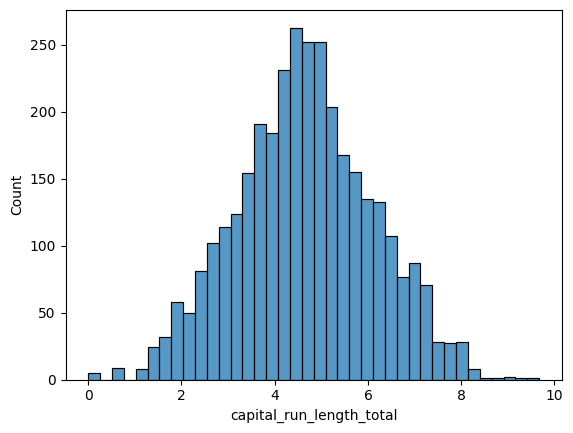

In [25]:
sns.histplot(np.log(X['capital_run_length_total']))

<Axes: xlabel='capital_run_length_total', ylabel='Count'>

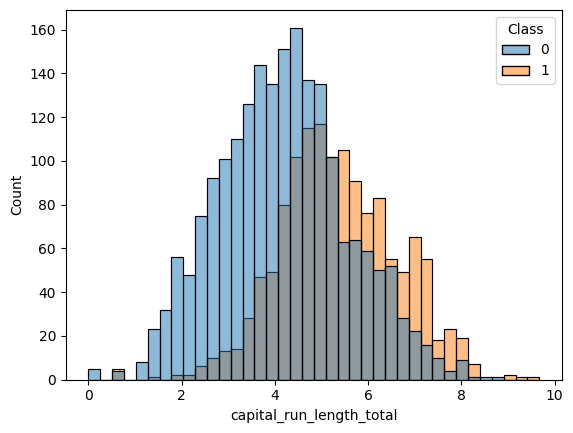

In [29]:
sns.histplot(x=np.log(X['capital_run_length_total']), hue=y['Class'])

<Axes: xlabel='capital_run_length_average', ylabel='Count'>

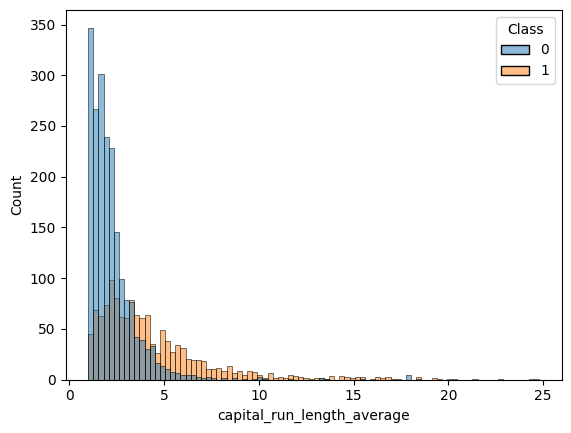

In [36]:
sns.histplot(x=X[X['capital_run_length_average']<25]['capital_run_length_average'], hue=y['Class'])

<Axes: xlabel='capital_run_length_average', ylabel='Count'>

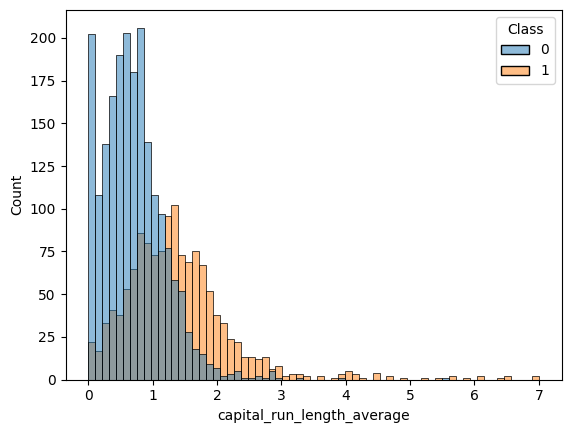

In [37]:
sns.histplot(x=np.log(X['capital_run_length_average']), hue=y['Class'])

<Axes: xlabel='word_freq_free', ylabel='Count'>

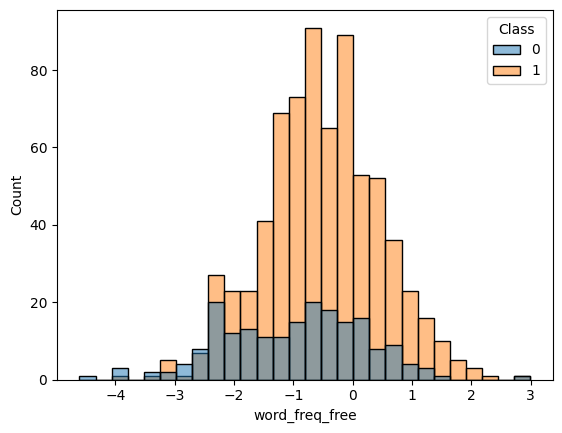

In [90]:
zeroes = X['word_freq_free']==0
sns.histplot(x=np.log(X[~zeroes]['word_freq_free']), hue=y['Class'])

<Axes: xlabel='word_freq_free', ylabel='Count'>

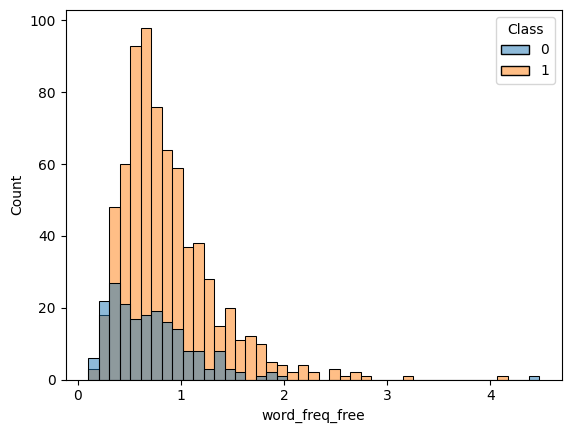

In [93]:
zeroes = X['word_freq_free']==0
sns.histplot(x=np.sqrt(X[~zeroes]['word_freq_free']), hue=y['Class'])

<Axes: xlabel='word_freq_free', ylabel='Count'>

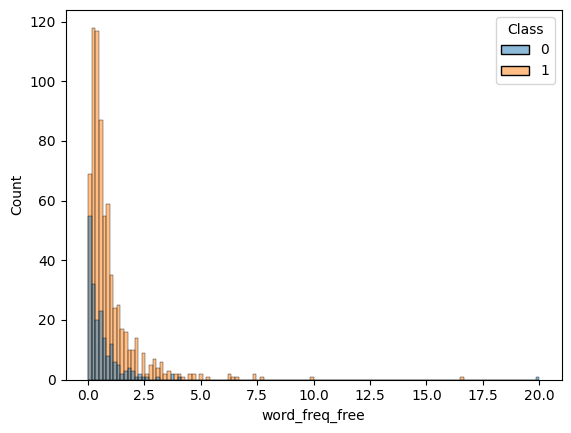

In [94]:
zeroes = X['word_freq_free']==0
sns.histplot(x=X[~zeroes]['word_freq_free'], hue=y['Class'])

In [74]:
y[(X['word_freq_parts'] > 0)].value_counts()

Class
0        45
1        18
Name: count, dtype: int64

In [78]:
np.sqrt(X['word_freq_will']).describe()

count    3368.000000
mean        0.499603
std         0.556837
min         0.000000
25%         0.000000
50%         0.424264
75%         0.911043
max         3.109662
Name: word_freq_will, dtype: float64

In [97]:
X.filter(regex='capital').describe()

capital_run_length_average  capital_run_length_longest  \
count                 3368.000000                 3368.000000   
mean                     5.555932                   53.241093   
std                     36.187550                  215.459482   
min                      1.000000                    1.000000   
25%                      1.641000                    7.000000   
50%                      2.321500                   15.000000   
75%                      3.722750                   45.000000   
max                   1102.500000                 9989.000000   

       capital_run_length_total  
count               3368.000000  
mean                 295.260392  
std                  632.476780  
min                    1.000000  
25%                   40.000000  
50%                  104.000000  
75%                  280.250000  
max                15841.000000

In [123]:
capital_cols = X.filter(like='capital')
pd.DataFrame({
    'regular': capital_cols.corrwith(y['Class']),
    'log': np.log(capital_cols).corrwith(y['Class']),
    'sqrt': np.sqrt(capital_cols).corrwith(y['Class'])
})

regular       log      sqrt
capital_run_length_average  0.105725  0.451539  0.265130
capital_run_length_longest  0.193268  0.492037  0.414709
capital_run_length_total    0.227787  0.399941  0.341162

In [118]:
freq_cols = X.filter(like='freq')
res = pd.DataFrame({
    'regular': freq_cols.corrwith(y['Class']),
    'sqrt': np.sqrt(freq_cols).corrwith(y['Class']),
})
res['diff'] = res['sqrt'].abs() - res['regular'].abs() 
display(res.sort_values(by='diff', ascending=False))
res['diff'].sum()

regular      sqrt      diff
char_freq_!           0.224968  0.511101  0.286133
char_freq_$           0.324011  0.514459  0.190448
word_freq_money       0.215821  0.390243  0.174421
word_freq_free        0.271480  0.434800  0.163320
word_freq_address     0.097950  0.249288  0.151338
word_freq_remove      0.327136  0.456437  0.129301
char_freq_#           0.070935  0.182990  0.112055
word_freq_hp         -0.272674 -0.383515  0.110841
word_freq_george     -0.166948 -0.276615  0.109668
word_freq_our         0.249670  0.355522  0.105852
word_freq_internet    0.203103  0.300715  0.097612
word_freq_credit      0.185133  0.276564  0.091431
word_freq_mail        0.138559  0.228182  0.089623
word_freq_hpl        -0.235728 -0.324894  0.089166
word_freq_all         0.173795  0.262300  0.088504
word_freq_your        0.399771  0.477212  0.077441
word_freq_000         0.330326  0.402309  0.071983
word_freq_over        0.208551  0.280472  0.071921
word_freq_make        0.139061  0.209255  0.070194
word_freq_85         -0.149108 -0.217486  0.068378
word_freq_receive     0.271056  0.339221  0.068165
word_freq_will       -0.010662  0.078490  0.067828
word_freq_email       0.192513  0.258986  0.066473
word_freq_you         0.258998  0.322016  0.063018
word_freq_business    0.267409  0.330176  0.062767
word_freq_edu        -0.146806 -0.206824  0.060018
word_freq_telnet     -0.129524 -0.186573  0.057049
word_freq_report      0.049516  0.106063  0.056546
word_freq_people      0.112041  0.168071  0.056030
word_freq_lab        -0.148683 -0.203603  0.054920
word_freq_1999       -0.196042 -0.250702  0.054660
word_freq_labs       -0.177422 -0.231743  0.054320
word_freq_650        -0.159156 -0.210810  0.051653
word_freq_project    -0.109651 -0.160823  0.051172
word_freq_meeting    -0.143852 -0.191110  0.047258
char_freq_[          -0.070403 -0.117485  0.047082
word_freq_data       -0.119617 -0.165843  0.046225
word_freq_conference -0.085562 -0.131031  0.045469
word_freq_addresses   0.181693  0.226557  0.044863
word_freq_order       0.235937  0.276713  0.040776
word_freq_pm         -0.125734 -0.164513  0.038779
word_freq_857        -0.117497 -0.156039  0.038542
word_freq_415        -0.115732 -0.151102  0.035370
word_freq_technology -0.144634 -0.176934  0.032300
char_freq_;          -0.064641 -0.095632  0.030991
word_freq_cs         -0.102515 -0.130632  0.028118
word_freq_3d          0.061472  0.083099  0.021627
word_freq_font        0.096335  0.115625  0.019290
word_freq_re         -0.149450 -0.166613  0.017163
word_freq_original   -0.147551 -0.158975  0.011424
word_freq_parts      -0.039495 -0.042378  0.002883
char_freq_(          -0.103634 -0.104044  0.000410
word_freq_table      -0.040583 -0.039328 -0.001255
word_freq_direct     -0.059439 -0.030911 -0.028528

3.6930401333126763

In [137]:
freq_cols = X.filter(like='freq')
res = pd.DataFrame({
    'regular': freq_cols.corrwith(y['Class']),
    'log': np.log(freq_cols + 0.001).corrwith(y['Class']),
})
res['diff'] = res['log'].abs() - res['regular'].abs() 
display(res.sort_values(by='diff', ascending=False))
res['diff'].sum()

regular       log      diff
char_freq_!           0.224968  0.578426  0.353458
word_freq_money       0.215821  0.447049  0.231228
char_freq_$           0.324011  0.552687  0.228676
word_freq_address     0.097950  0.315978  0.218027
word_freq_free        0.271480  0.487242  0.215762
word_freq_remove      0.327136  0.514725  0.187589
char_freq_#           0.070935  0.249183  0.178248
word_freq_george     -0.166948 -0.335932  0.168984
word_freq_hp         -0.272674 -0.426233  0.153559
word_freq_our         0.249670  0.389489  0.139819
word_freq_mail        0.138559  0.277916  0.139356
word_freq_will       -0.010662  0.145365  0.134703
word_freq_credit      0.185133  0.316708  0.131576
word_freq_internet    0.203103  0.328267  0.125164
word_freq_hpl        -0.235728 -0.358928  0.123201
word_freq_all         0.173795  0.296402  0.122607
word_freq_make        0.139061  0.232561  0.093500
word_freq_email       0.192513  0.284757  0.092244
word_freq_receive     0.271056  0.360623  0.089567
word_freq_report      0.049516  0.137604  0.088088
word_freq_over        0.208551  0.295432  0.086881
word_freq_000         0.330326  0.415884  0.085558
word_freq_telnet     -0.129524 -0.209328  0.079804
word_freq_85         -0.149108 -0.228237  0.079129
word_freq_labs       -0.177422 -0.256102  0.078680
word_freq_lab        -0.148683 -0.226326  0.077643
word_freq_edu        -0.146806 -0.222487  0.075682
word_freq_1999       -0.196042 -0.271066  0.075024
word_freq_people      0.112041  0.187044  0.075002
word_freq_business    0.267409  0.341081  0.073673
word_freq_650        -0.159156 -0.231109  0.071952
word_freq_your        0.399771  0.467215  0.067443
word_freq_addresses   0.181693  0.249075  0.067382
word_freq_meeting    -0.143852 -0.208867  0.065015
word_freq_project    -0.109651 -0.174605  0.064954
word_freq_conference -0.085562 -0.147308  0.061746
char_freq_[          -0.070403 -0.129397  0.058994
word_freq_you         0.258998  0.315774  0.056776
word_freq_data       -0.119617 -0.176163  0.056545
word_freq_857        -0.117497 -0.172341  0.054844
word_freq_order       0.235937  0.287590  0.051653
word_freq_415        -0.115732 -0.163226  0.047494
word_freq_3d          0.061472  0.105542  0.044071
word_freq_cs         -0.102515 -0.145479  0.042965
word_freq_font        0.096335  0.137072  0.040736
word_freq_technology -0.144634 -0.182134  0.037500
word_freq_pm         -0.125734 -0.162229  0.036495
char_freq_;          -0.064641 -0.100103  0.035462
word_freq_original   -0.147551 -0.145477 -0.002075
word_freq_parts      -0.039495 -0.035066 -0.004429
word_freq_table      -0.040583 -0.030699 -0.009884
word_freq_re         -0.149450 -0.113839 -0.035611
word_freq_direct     -0.059439  0.007479 -0.051960
char_freq_(          -0.103634 -0.029951 -0.073683

4.78682083631087

In [135]:
res['log'].abs().sort_values()

word_freq_direct        0.007479
char_freq_(             0.029951
word_freq_table         0.030699
word_freq_parts         0.035066
char_freq_;             0.100103
word_freq_3d            0.105542
word_freq_re            0.113839
char_freq_[             0.129397
word_freq_font          0.137072
word_freq_report        0.137604
word_freq_will          0.145365
word_freq_original      0.145477
word_freq_cs            0.145479
word_freq_conference    0.147308
word_freq_pm            0.162229
word_freq_415           0.163226
word_freq_857           0.172341
word_freq_project       0.174605
word_freq_data          0.176163
word_freq_technology    0.182134
word_freq_people        0.187044
word_freq_meeting       0.208867
word_freq_telnet        0.209328
word_freq_edu           0.222487
word_freq_lab           0.226326
word_freq_85            0.228237
word_freq_650           0.231109
word_freq_make          0.232561
word_freq_addresses     0.249075
char_freq_#             0.249183
word_freq_

In [129]:
res[(res['log'].abs() > 0.1)].index

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_pm',
       'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
       'word_freq_project', 'word_freq_re', 'word_freq_edu',
       'word_freq_conference', 'char_freq_;', 'char_freq_[', 'char_freq_!',
       'char_

In [165]:
pos_corr = res[(res['log'] > 0.1)].index 
neg_corr = res[(res['log'] < 0.1)].index 
display(pos_corr)
neg_corr

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'char_freq_!', 'char_freq_$', 'char_freq_#'],
      dtype='object')

Index(['word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
       'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
       'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_['],
      dtype='object')

In [166]:
pd.DataFrame({
    'sum_word_freq': (X.filter(like='word_freq')/100).sum(axis=1),
    'sum_char_freq': (X.filter(like='char_freq')/100).sum(axis=1),
    'pos_sum_freq': (X[pos_corr].filter(like='freq')/100).sum(axis=1),
    'neg_sum_freq': (X[neg_corr].filter(like='freq')/100).sum(axis=1),
}).corrwith(y['Class'])

sum_word_freq    0.080480
sum_char_freq    0.224412
pos_sum_freq     0.606060
neg_sum_freq    -0.406997
dtype: float64

In [170]:
pd.DataFrame({
    'sum_word_freq': np.sqrt((X.filter(like='word_freq')/100).sum(axis=1)),
    'sum_char_freq': np.sqrt((X.filter(like='char_freq')/100).sum(axis=1)),
    'pos_sum_freq': np.sqrt((X[pos_corr].filter(like='freq')/100).sum(axis=1)),
    'neg_sum_freq': np.sqrt((X[neg_corr].filter(like='freq')/100).sum(axis=1)),
}).corrwith(y['Class'])

sum_word_freq    0.131504
sum_char_freq    0.389081
pos_sum_freq     0.594933
neg_sum_freq    -0.567951
dtype: float64

In [171]:
sums = pd.DataFrame({
    'sum_word_freq': (X.filter(like='word_freq')/100).sum(axis=1),
    'sum_char_freq': (X.filter(like='char_freq')/100).sum(axis=1),
})

In [182]:
sumdivs = pd.DataFrame()
for col in X.filter(like='word_freq').columns:
    sumdivs[col + '_sumdiv'] = X[col] / sums['sum_word_freq']
for col in X.filter(like='char_freq').columns:
    sumdivs[col + '_sumdiv'] = X[col] / sums['sum_char_freq']

np.log(sumdivs+0.001).corrwith(y['Class']).sort_values(ascending=False)

word_freq_remove_sumdiv        0.516120
char_freq_!_sumdiv             0.512245
char_freq_$_sumdiv             0.497868
word_freq_free_sumdiv          0.478026
word_freq_money_sumdiv         0.445319
word_freq_your_sumdiv          0.441706
word_freq_000_sumdiv           0.406008
word_freq_our_sumdiv           0.371846
word_freq_receive_sumdiv       0.352087
word_freq_business_sumdiv      0.323498
word_freq_credit_sumdiv        0.313729
word_freq_internet_sumdiv      0.313586
word_freq_address_sumdiv       0.308696
word_freq_you_sumdiv           0.279452
word_freq_over_sumdiv          0.273730
word_freq_email_sumdiv         0.271423
word_freq_all_sumdiv           0.271413
word_freq_order_sumdiv         0.270551
word_freq_mail_sumdiv          0.268276
word_freq_addresses_sumdiv     0.244319
char_freq_#_sumdiv             0.216178
word_freq_make_sumdiv          0.209669
word_freq_people_sumdiv        0.168302
word_freq_font_sumdiv          0.137153
word_freq_report_sumdiv        0.129248


In [192]:
np.log(X['capital_run_length_total'] / X['capital_run_length_average']).corr(y['Class'])

0.21341001622162428

In [190]:
capital_cols.corrwith(X['capital_run_length_total'] / X['capital_run_length_average'])

capital_run_length_average   -0.025526
capital_run_length_longest    0.059627
capital_run_length_total      0.801964
dtype: float64